<a href="https://colab.research.google.com/github/edmgjr/portifolio/blob/main/Analise_Explorat%C3%B3ria_Pre%C3%A7os_combustiveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pacotes usados neste Notebook

In [1]:
#importando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#1.Dataset

Dataset: Gas Prices in Brazil: https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil

Este dataset contém os registros dos preços médios semanais dos combustíveis do Brasil entre os anos de 2004 e 2019.
Cada observação (registro/linha) consiste em um registro de preço aferido para um dado tipo de combustível em uma dada localidade do Brasil.
Alguns dos principais atributos (colunas) do dataset são: 'ESTADO', 'PRODUTO', 'NÚMERO DE POSTOS PESQUISADOS', 'PREÇO MÉDIO REVENDA'.

O dataset utilizado neste notebook já foi pré-processado anteriormente.

##1.1. Importando o Dataset

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d matheusfreitag/gas-prices-in-brazil

  0% 0.00/3.15M [00:00<?, ?B/s]
100% 3.15M/3.15M [00:00<00:00, 79.3MB/s]


In [4]:
! unzip gas-prices-in-brazil.zip

Archive:  gas-prices-in-brazil.zip
  inflating: 2004-2019.tsv           


In [5]:
data = pd.read_csv('/content/2004-2019.tsv', sep='\t')

In [6]:
data = data.drop(columns='Unnamed: 0')
data

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0,2.756,2.756,0,6,2019
106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,3.230,3.789,0.95,0.038,2.451,0.402,1.9842,2.8661,0.164,6,2019
106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0,1.9981,1.9981,0,6,2019
106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.5093,0.07,6,2019


##1.2. Conversão de tipos de atributos

In [7]:
data_pre = data.copy()

In [8]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   106823 non-null  object 
 1   DATA FINAL                     106823 non-null  object 
 2   REGIÃO                         106823 non-null  object 
 3   ESTADO                         106823 non-null  object 
 4   PRODUTO                        106823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 6   UNIDADE DE MEDIDA              106823 non-null  object 
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 11  MARGEM MÉDIA REVENDA           106823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

 **Datas**

Convertendo para o formato datetime

In [9]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   106823 non-null  object 
 1   DATA FINAL                     106823 non-null  object 
 2   REGIÃO                         106823 non-null  object 
 3   ESTADO                         106823 non-null  object 
 4   PRODUTO                        106823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 6   UNIDADE DE MEDIDA              106823 non-null  object 
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 11  MARGEM MÉDIA REVENDA           106823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [10]:
data_pre['DATA INICIAL'] = pd.to_datetime(data_pre['DATA INICIAL'])
data_pre['DATA FINAL'] = pd.to_datetime(data_pre['DATA FINAL'])

**Dados númericos**

Convertendo atributos para 'numeric'

In [11]:
for atributo in ['MARGEM MÉDIA REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO']:
  data_pre[atributo] = pd.to_numeric(data_pre[atributo], errors='coerce') #Em caso de erro na conversão (p. ex., uma string que não representa um número), um valor vazio (null / NaN) será atribuido no lugar

In [12]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   106823 non-null  datetime64[ns]
 1   DATA FINAL                     106823 non-null  datetime64[ns]
 2   REGIÃO                         106823 non-null  object        
 3   ESTADO                         106823 non-null  object        
 4   PRODUTO                        106823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64         
 6   UNIDADE DE MEDIDA              106823 non-null  object        
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64       
 11  

##1.3. Limpeza de dados

In [13]:
mask = data_pre['PREÇO MÉDIO DISTRIBUIÇÃO'].isnull()

In [14]:
data_pre[mask]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,2.090,NaN,0.167,NaN,NaN,NaN,NaN,NaN,9,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,2.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,2.290,NaN,0.010,NaN,NaN,NaN,NaN,NaN,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,2.200,NaN,0.018,NaN,NaN,NaN,NaN,NaN,2,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,2.300,NaN,0.030,NaN,NaN,NaN,NaN,NaN,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,3.699,NaN,0.043,NaN,NaN,NaN,NaN,NaN,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,3.890,NaN,0.094,NaN,NaN,NaN,NaN,NaN,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,3.299,NaN,0.002,NaN,NaN,NaN,NaN,NaN,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,NaN,0.028,NaN,NaN,NaN,NaN,NaN,6,2019


In [15]:
data[mask]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,2.090,-,0.167,-,-,-,-,-,9,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,2.000,-,0.000,-,-,-,-,-,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,2.290,-,0.010,-,-,-,-,-,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,2.200,-,0.018,-,-,-,-,-,2,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,2.300,-,0.030,-,-,-,-,-,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,3.699,-,0.043,-,-,-,-,-,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,3.890,-,0.094,-,-,-,-,-,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,3.299,-,0.002,-,-,-,-,-,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,-,0.028,-,-,-,-,-,6,2019


Nos dados originais os valores nulos eram hífens "-"

In [16]:
data_pre_fill = data_pre.fillna(0) #Substituindo valores nulos por 0
data_pre_fill

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0.000,2.7560,2.75600,0.000,6,2019
106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,3.230,3.789,0.950,0.038,2.451,0.402,1.9842,2.86610,0.164,6,2019
106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0.000,1.9981,1.99810,0.000,6,2019
106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.50930,0.070,6,2019


In [17]:
data_pre_fill[mask]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,2.090,0.0,0.167,0.0,0.0,0.0,0.0,0.0,9,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,2.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,2.290,0.0,0.010,0.0,0.0,0.0,0.0,0.0,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,2.200,0.0,0.018,0.0,0.0,0.0,0.0,0.0,2,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,2.300,0.0,0.030,0.0,0.0,0.0,0.0,0.0,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,3.699,0.0,0.043,0.0,0.0,0.0,0.0,0.0,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,3.890,0.0,0.094,0.0,0.0,0.0,0.0,0.0,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,3.299,0.0,0.002,0.0,0.0,0.0,0.0,0.0,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,0.0,0.028,0.0,0.0,0.0,0.0,0.0,6,2019


In [18]:
data_pre_fill = data_pre.fillna(value={
    'MARGEM MÉDIA REVENDA': 10, 
    'PREÇO MÉDIO DISTRIBUIÇÃO': 20, 
    'DESVIO PADRÃO DISTRIBUIÇÃO': 30, 
    'PREÇO MÍNIMO DISTRIBUIÇÃO': 40, 
    'PREÇO MÁXIMO DISTRIBUIÇÃO': 50, 
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO': 'vazio'
}) #Substituindo valores nulos por valores personalizados
data_pre_fill

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0.000,2.7560,2.75600,0,6,2019
106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,3.230,3.789,0.950,0.038,2.451,0.402,1.9842,2.86610,0.164,6,2019
106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0.000,1.9981,1.99810,0,6,2019
106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.50930,0.07,6,2019


In [19]:
data_pre_fill[mask]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,2.090,10.0,0.167,20.0,30.0,40.0,50.0,vazio,9,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,2.000,10.0,0.000,20.0,30.0,40.0,50.0,vazio,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,2.290,10.0,0.010,20.0,30.0,40.0,50.0,vazio,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,2.200,10.0,0.018,20.0,30.0,40.0,50.0,vazio,2,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,2.300,10.0,0.030,20.0,30.0,40.0,50.0,vazio,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,3.699,10.0,0.043,20.0,30.0,40.0,50.0,vazio,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,3.890,10.0,0.094,20.0,30.0,40.0,50.0,vazio,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,3.299,10.0,0.002,20.0,30.0,40.0,50.0,vazio,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,10.0,0.028,20.0,30.0,40.0,50.0,vazio,6,2019


A fim de não ter valores sintéticos gerados pelo `fillna`, que possam atrapalhar a análise, será removido (`dropna`) todas as amostras que possuem qualquer valor **NaN** para quaisquer atributos/colunas.





In [20]:
data_pre.dropna(inplace=True)

In [21]:
data_pre[mask]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO


In [22]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103392 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   103392 non-null  datetime64[ns]
 1   DATA FINAL                     103392 non-null  datetime64[ns]
 2   REGIÃO                         103392 non-null  object        
 3   ESTADO                         103392 non-null  object        
 4   PRODUTO                        103392 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   103392 non-null  int64         
 6   UNIDADE DE MEDIDA              103392 non-null  object        
 7   PREÇO MÉDIO REVENDA            103392 non-null  float64       
 8   DESVIO PADRÃO REVENDA          103392 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           103392 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           103392 non-null  float64       
 11  

In [23]:
data = data_pre.copy()

#2. Análise Exploratória de Dados

##2.1. Como os preços da Gasolina Comum em São Paulo variaram em 2018?

In [24]:
df = data.query('ESTADO == "SAO PAULO" and ANO == 2018 and PRODUTO == "GASOLINA COMUM"').reset_index(drop=True)

In [25]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2018-01-07,2018-01-13,SUDESTE,SAO PAULO,GASOLINA COMUM,1641,R$/l,3.988,0.156,3.499,4.599,0.411,0.039,3.577,0.104,2.990,3.9510,0.029,1,2018
1,2018-01-14,2018-01-20,SUDESTE,SAO PAULO,GASOLINA COMUM,1648,R$/l,4.002,0.155,3.549,4.499,0.412,0.039,3.590,0.102,2.990,3.9014,0.028,1,2018
2,2018-01-21,2018-01-27,SUDESTE,SAO PAULO,GASOLINA COMUM,1648,R$/l,4.006,0.160,3.499,4.899,0.410,0.040,3.596,0.102,2.990,3.9014,0.028,1,2018
3,2018-01-28,2018-02-03,SUDESTE,SAO PAULO,GASOLINA COMUM,1644,R$/l,4.019,0.156,3.579,4.699,0.423,0.039,3.596,0.107,2.924,3.9537,0.030,1,2018
4,2018-02-04,2018-02-10,SUDESTE,SAO PAULO,GASOLINA COMUM,1646,R$/l,4.004,0.157,3.579,4.597,0.416,0.039,3.588,0.102,2.990,3.9537,0.028,2,2018


**Estatisticas Descritivas**

In [26]:
df.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.00000,52.000000,52.000000,52.000000,52.0
mean,1610.211538,4.202769,0.175500,3.671500,4.975750,0.442481,0.041750,3.760288,0.109654,3.31295,4.139454,0.029096,6.615385,2018.0
std,213.627432,0.180672,0.017955,0.163808,0.211198,0.063271,0.003965,0.163664,0.010712,0.26684,0.195897,0.002460,3.470627,0.0
min,102.000000,3.970000,0.150000,3.369000,4.499000,0.366000,0.034000,3.563000,0.087000,2.92400,3.887500,0.023000,1.000000,2018.0
25%,1639.000000,4.008000,0.159750,3.499000,4.899000,0.404500,0.039000,3.620250,0.102000,2.99000,3.965775,0.028000,4.000000,2018.0
50%,1642.000000,4.202000,0.173000,3.679000,4.999000,0.421500,0.040000,3.756500,0.108000,3.35000,4.095500,0.029000,7.000000,2018.0
75%,1644.000000,4.336250,0.189000,3.784000,5.099000,0.470250,0.044000,3.862250,0.116250,3.53250,4.259000,0.030000,9.250000,2018.0
max,1649.000000,4.512000,0.216000,3.969000,5.299000,0.640000,0.051000,4.085000,0.144000,3.76000,4.551000,0.037000,12.000000,2018.0


In [27]:
df['PREÇO MÉDIO REVENDA'].describe()

count    52.000000
mean      4.202769
std       0.180672
min       3.970000
25%       4.008000
50%       4.202000
75%       4.336250
max       4.512000
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [28]:
df['PREÇO MÉDIO REVENDA'].describe().to_frame()

,PREÇO MÉDIO REVENDA
count,52.000000
mean,4.202769
std,0.180672
min,3.970000
25%,4.008000
50%,4.202000
75%,4.336250
max,4.512000


**Tendência Central dos Preços**

In [29]:
print(f'O preço médio da Gasolina no Estado de São Paulo em 2018 foi de R$ {df["PREÇO MÉDIO REVENDA"].mean():.2f} ± {df["PREÇO MÉDIO REVENDA"].std():.2f}')

O preço médio da Gasolina no Estado de São Paulo em 2018 foi de R$ 4.20 ± 0.18


Text(0, 0.5, 'Preço Médio (R$)')

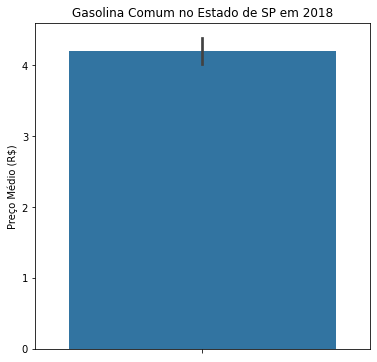

In [30]:
plt.figure(figsize=(6,6))
ax = sns.barplot(y='PREÇO MÉDIO REVENDA', ci='sd', data=df)
ax.set_title('Gasolina Comum no Estado de SP em 2018')
ax.set_ylabel('Preço Médio (R$)')

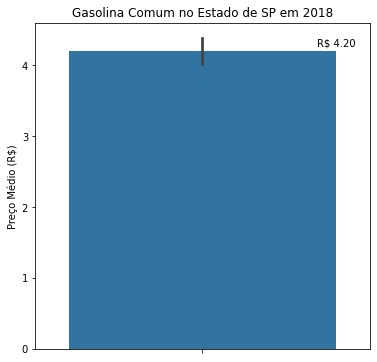

In [31]:
#Técnica para colocar o valor da variável em cima da barra

plt.figure(figsize=(6,6))
ax = sns.barplot(y='PREÇO MÉDIO REVENDA', ci='sd', data=df)
ax.set_title('Gasolina Comum no Estado de SP em 2018')
ax.set_ylabel('Preço Médio (R$)')

for bar in ax.patches:
  height = bar.get_height()
  x = bar.get_x() + bar.get_width()
  y = height
  ax.annotate(f'R$ {height:.2f}',
              xy = (x,y),
              xytext=(0,3),
              textcoords='offset points',
              ha = 'center', va = 'bottom')

In [32]:
print(f'A mediana do preço da Gasolina Comum no estado de SP em 2018 foi R$ {df["PREÇO MÉDIO REVENDA"].median():.2f}')

A mediana do preço da Gasolina Comum no estado de SP em 2018 foi R$ 4.20


**Variabilidade**

Histograma com número de bins padrão:

Text(0, 0.5, 'Frequência')

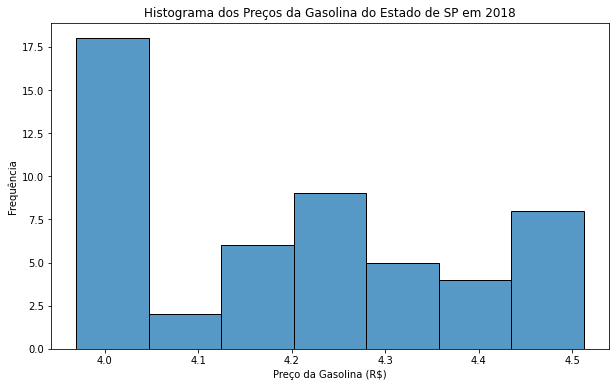

In [33]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Histograma dos Preços da Gasolina do Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')
ax.set_ylabel('Frequência')

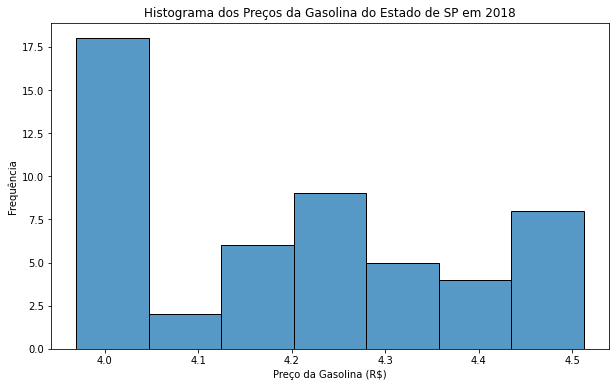

In [34]:
#Alterando o número de ticks
plt.figure(figsize=(10,6))
ax = sns.histplot(x='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Histograma dos Preços da Gasolina do Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')
ax.set_ylabel('Frequência')
ax.set_xticks(np.arange(4,4.6,0.1))

**Alterando o número de bins do Histrograma.**

Text(0, 0.5, 'Frequência')

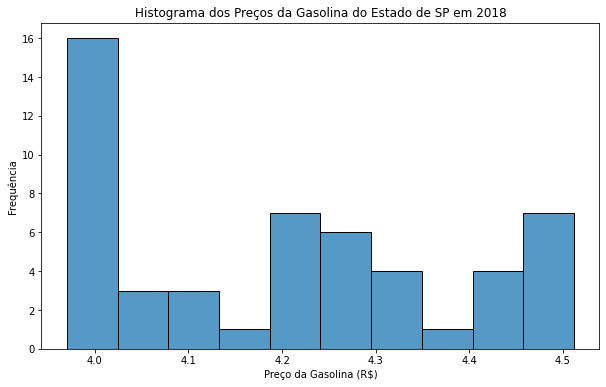

In [35]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x='PREÇO MÉDIO REVENDA', data=df, bins = 10)
ax.set_title('Histograma dos Preços da Gasolina do Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')
ax.set_ylabel('Frequência')

**Checando a variabilidade usando Boxplots**

Text(0.5, 0, 'Preço da Gasolina (R$)')

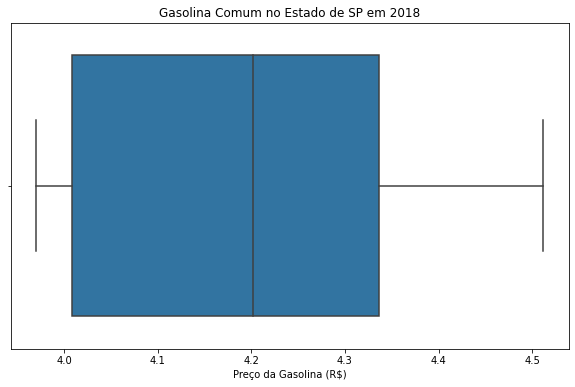

In [36]:
#Checando a variabilidade da distribuição dos preços médios de revenda do estado de SP em 2018
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Gasolina Comum no Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')

**Checando a variabilidade usando Violin Plot**

Text(0.5, 0, 'Preço da Gasolina (R$)')

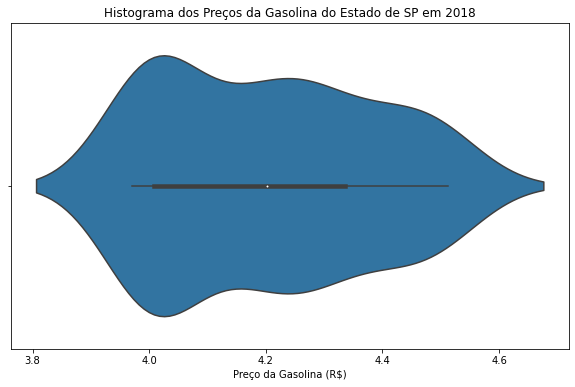

In [37]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Histograma dos Preços da Gasolina do Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')

##2.2. Como os preços da Gasolina Comum e do Etanol em São Paulo variaram em 2018?

In [38]:
df = data.query('ESTADO == "SAO PAULO" and ANO == 2018 and PRODUTO in ["GASOLINA COMUM", "ETANOL HIDRATADO"]').reset_index(drop=True)

In [39]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2018-01-07,2018-01-13,SUDESTE,SAO PAULO,ETANOL HIDRATADO,1664,R$/l,2.833,0.139,2.449,3.399,0.338,0.049,2.495,0.092,2.1842,2.8833,0.037,1,2018
1,2018-01-07,2018-01-13,SUDESTE,SAO PAULO,GASOLINA COMUM,1641,R$/l,3.988,0.156,3.499,4.599,0.411,0.039,3.577,0.104,2.9900,3.9510,0.029,1,2018
2,2018-01-14,2018-01-20,SUDESTE,SAO PAULO,ETANOL HIDRATADO,1661,R$/l,2.868,0.134,2.399,3.399,0.331,0.047,2.537,0.087,2.2600,2.8471,0.034,1,2018
3,2018-01-14,2018-01-20,SUDESTE,SAO PAULO,GASOLINA COMUM,1648,R$/l,4.002,0.155,3.549,4.499,0.412,0.039,3.590,0.102,2.9900,3.9014,0.028,1,2018
4,2018-01-21,2018-01-27,SUDESTE,SAO PAULO,ETANOL HIDRATADO,1662,R$/l,2.874,0.135,2.399,3.399,0.324,0.047,2.550,0.095,1.6900,2.9722,0.037,1,2018


**Computando as estatísticas descritivas**

In [40]:
stats = df.groupby('PRODUTO')['PREÇO MÉDIO REVENDA'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
PRODUTO,,,,,,,,
ETANOL HIDRATADO,52.0,2.711904,0.141365,2.393,2.6315,2.720,2.83825,2.892
GASOLINA COMUM,52.0,4.202769,0.180672,3.970,4.0080,4.202,4.33625,4.512


In [41]:
print(f'O preço médio do Etanol no Estado de SP em 2018 foi de R$ {stats.loc["ETANOL HIDRATADO", "mean"]:.2f} ± {stats.loc["ETANOL HIDRATADO", "std"]:.2f}')
print(f'O preço médio da Gasolina Comum no Estado de SP em 2018 foi de R$ {stats.loc["GASOLINA COMUM", "mean"]:.2f} ± {stats.loc["GASOLINA COMUM", "std"]:.2f}')

O preço médio do Etanol no Estado de SP em 2018 foi de R$ 2.71 ± 0.14
O preço médio da Gasolina Comum no Estado de SP em 2018 foi de R$ 4.20 ± 0.18


In [42]:
print(f'A mediana do preço do Etanol no Estado de SP em 2018 foi de R$ {stats.loc["ETANOL HIDRATADO", "50%"]:.2f}')
print(f'A mediana do preço da Gasolina Comum no Estado de SP em 2018 foi de R$ {stats.loc["GASOLINA COMUM", "50%"]:.2f}')

A mediana do preço do Etanol no Estado de SP em 2018 foi de R$ 2.72
A mediana do preço da Gasolina Comum no Estado de SP em 2018 foi de R$ 4.20


**Gráfico de Barras**

Text(0, 0.5, 'Preço Médio (R$)')

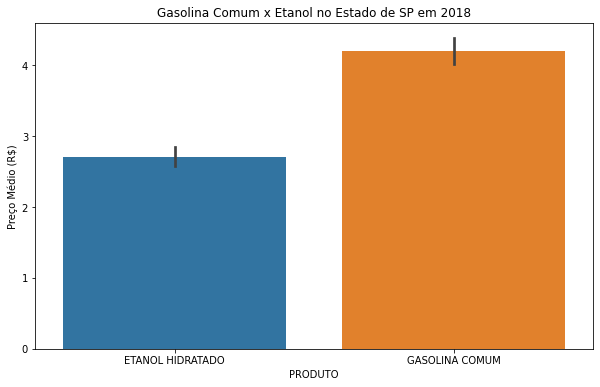

In [43]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="PRODUTO", y='PREÇO MÉDIO REVENDA', ci='sd', data=df)
ax.set_title('Gasolina Comum x Etanol no Estado de SP em 2018')
ax.set_ylabel('Preço Médio (R$)')

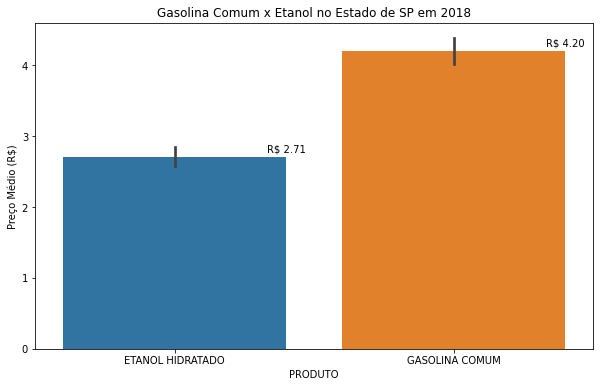

In [44]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="PRODUTO", y='PREÇO MÉDIO REVENDA', ci='sd', data=df)
ax.set_title('Gasolina Comum x Etanol no Estado de SP em 2018')
ax.set_ylabel('Preço Médio (R$)')

for bar in ax.patches:
  height = bar.get_height()
  x = bar.get_x() + bar.get_width()
  y = height
  ax.annotate(f'R$ {height:.2f}',
              xy = (x,y),
              xytext=(0,3),
              textcoords='offset points',
              ha = 'center', va = 'bottom')

**Histogramas**

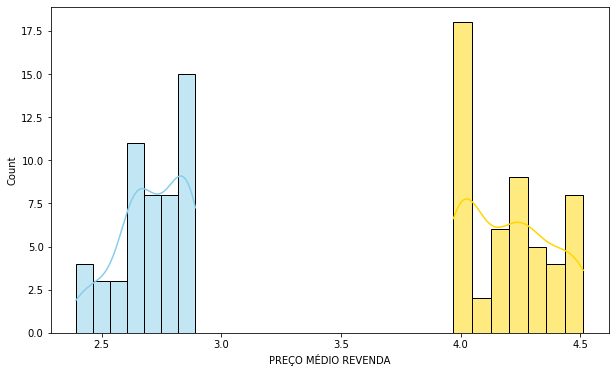

In [45]:
plt.figure(figsize=(10,6))
ax = sns.histplot(kde=True, color = 'skyblue', x='PREÇO MÉDIO REVENDA', data=df.query('PRODUTO == "ETANOL HIDRATADO"'))
ax = sns.histplot(kde=True, color = 'gold', x='PREÇO MÉDIO REVENDA', data=df.query('PRODUTO == "GASOLINA COMUM"'))

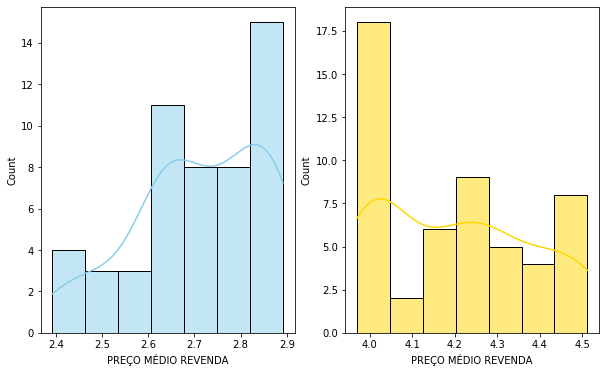

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
ax = sns.histplot(kde=True, color = 'skyblue', x='PREÇO MÉDIO REVENDA', data=df.query('PRODUTO == "ETANOL HIDRATADO"'), ax=axs[0])
ax = sns.histplot(kde=True, color = 'gold', x='PREÇO MÉDIO REVENDA', data=df.query('PRODUTO == "GASOLINA COMUM"'),ax=axs[1])

**BoxPlot**

Text(0.5, 0, 'Produto')

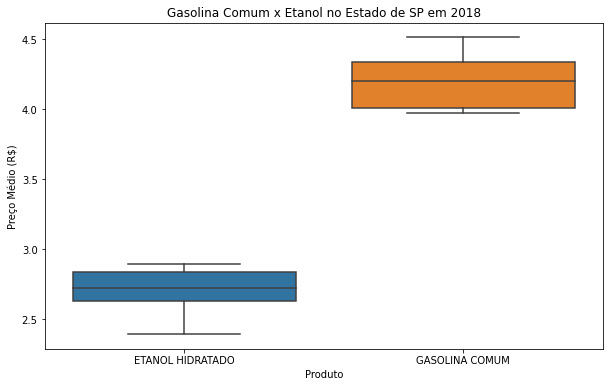

In [47]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="PRODUTO", y='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Gasolina Comum x Etanol no Estado de SP em 2018')
ax.set_ylabel('Preço Médio (R$)')
ax.set_xlabel("Produto")

**Violin Plot**

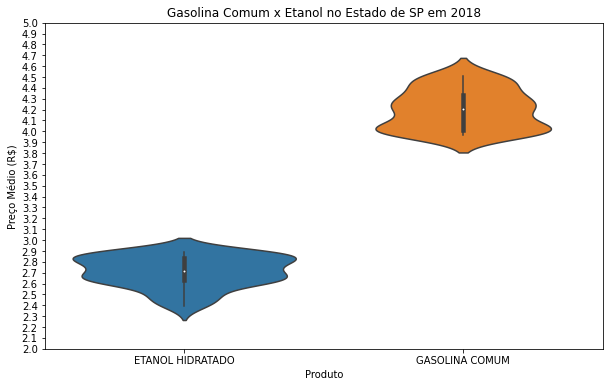

In [48]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x="PRODUTO", y='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Gasolina Comum x Etanol no Estado de SP em 2018')
ax.set_ylabel('Preço Médio (R$)')
ax.set_xlabel("Produto")
ax.set_yticks(np.arange(2.0, 5.01, 0.1))

##2.3. Como os preços da Gasolina Comum e Etanol variaram no estado de SP ao longo dos anos?

In [49]:
df = data.query('ESTADO == "SAO PAULO" and PRODUTO in ["ETANOL HIDRATADO", "GASOLINA COMUM"]').reset_index(drop=True)

In [50]:
df.groupby(by=["ANO", "PRODUTO"])["PREÇO MÉDIO REVENDA"].describe()

count      mean       std  ...     50%      75%    max
ANO  PRODUTO                                      ...                        
2004 ETANOL HIDRATADO   34.0  1.049059  0.157977  ...  1.0325  1.18900  1.277
     GASOLINA COMUM     34.0  2.047294  0.087135  ...  2.0340  2.09900  2.205
2005 ETANOL HIDRATADO   50.0  1.182500  0.112241  ...  1.2170  1.25100  1.424
     GASOLINA COMUM     50.0  2.232900  0.087034  ...  2.1910  2.34875  2.372
2006 ETANOL HIDRATADO   53.0  1.419623  0.189749  ...  1.3550  1.53600  1.808
     GASOLINA COMUM     53.0  2.442585  0.030641  ...  2.4450  2.45800  2.496
2007 ETANOL HIDRATADO   52.0  1.272212  0.146878  ...  1.2960  1.39375  1.507
     GASOLINA COMUM     52.0  2.413865  0.024343  ...  2.4165  2.43000  2.458
2008 ETANOL HIDRATADO   52.0  1.273769  0.028608  ...  1.2700  1.30050  1.318
     GASOLINA COMUM     52.0  2.402788  0.006393  ...  2.4020  2.40900  2.416
2009 ETANOL HIDRATADO   50.0  1.329040  0.144401  ...  1.3000  1.44825  1.668
     GASOLINA COMUM     50.0  2.403000  0.027974  ...  2.4020  2.42000  2.457
2010 ETANOL HIDRATADO   52.0  1.520019  0.178069  ...  1.5020  1.65000  1.830
     GASOLINA COMUM     52.0  2.462500  0.031362  ...  2.4550  2.48925  2.538
2011 ETANOL HIDRATADO   52.0  1.865846  0.136504  ...  1.8620  1.92025  2.210
     GASOLINA COMUM     52.0  2.643231  0.078272  ...  2.6620  2.66925  2.826
2012 ETANOL HIDRATADO   53.0  1.806623  0.050139  ...  1.8100  1.84300  1.918
     GASOLINA COMUM     53.0  2.636642  0.012147  ...  2.6360  2.64300  2.663
2013 ETANOL HIDRATADO   52.0  1.830558  0.079028  ...  1.8140  1.90525  1.973
     GASOLINA COMUM     52.0  2.736404  0.045640  ...  2.7215  2.76800  2.837
2014 ETANOL HIDRATADO   52.0  1.924231  0.068262  ...  1.8960  1.95750  2.069
     GASOLINA COMUM     52.0  2.866519  0.023827  ...  2.8610  2.88850  2.911
2015 ETANOL HIDRATADO   51.0  2.104941  0.219741  ...  2.0230  2.15850  2.573
     GASOLINA COMUM     51.0  3.189353  0.159453  ...  3.1410  3.23150  3.515
2016 ETANOL HIDRATADO   52.0  2.483442  0.200223  ...  2.5175  2.67750  2.756
     GASOLINA COMUM     52.0  3.499038  0.048713  ...  3.4965  3.54050  3.600
2017 ETANOL HIDRATADO   53.0  2.516264  0.184322  ...  2.4750  2.71300  2.826
     GASOLINA COMUM     53.0  3.580245  0.180488  ...  3.6040  3.66800  3.975
2018 ETANOL HIDRATADO   52.0  2.711904  0.141365  ...  2.7200  2.83825  2.892
     GASOLINA COMUM     52.0  4.202769  0.180672  ...  4.2020  4.33625  4.512
2019 ETANOL HIDRATADO   25.0  2.717920  0.124178  ...  2.7220  2.82000  2.986
     GASOLINA COMUM     25.0  4.120480  0.109839  ...  4.1090  4.21400  4.287

[32 rows x 8 columns]

Lineplot

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


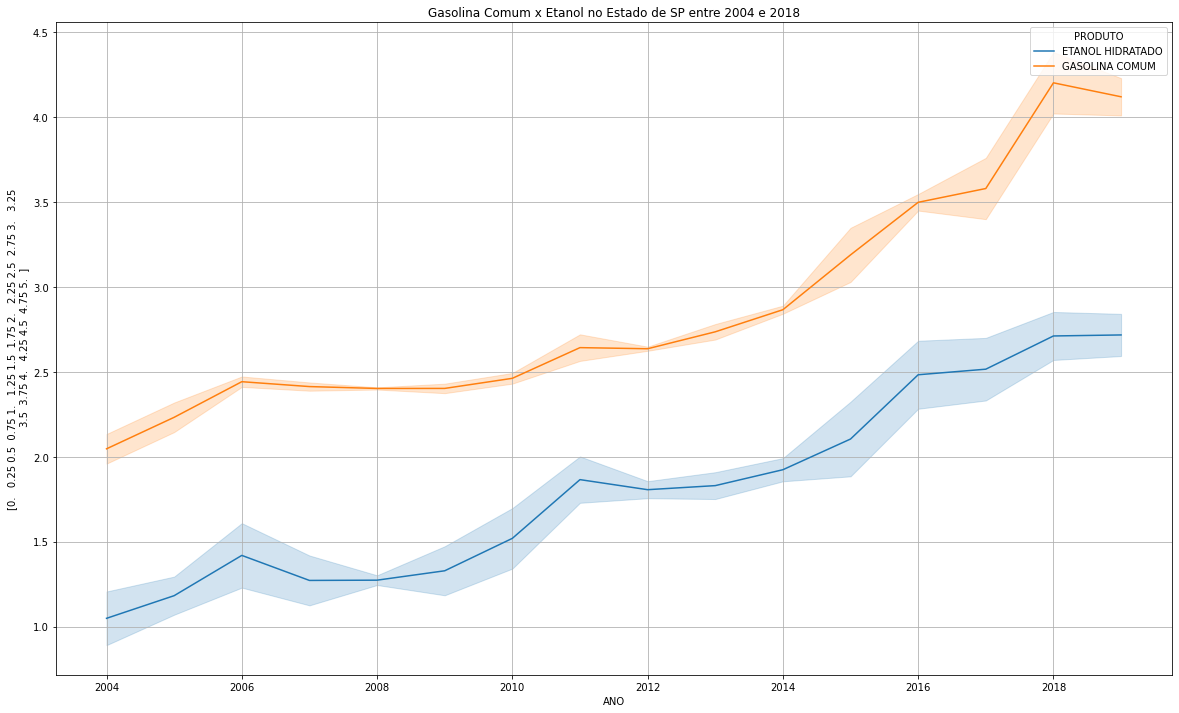

In [51]:
ticks_precos = np.arange(0.0, 5.01, 0.25)

plt.figure(figsize=(20,12))
ax = sns.lineplot(x="ANO", y='PREÇO MÉDIO REVENDA', ci='sd', data=df, hue="PRODUTO")
ax.set_title('Gasolina Comum x Etanol no Estado de SP entre 2004 e 2018')
ax.set_ylabel(ticks_precos)
plt.grid()

**Checando a diferença (decomposição) de Preços entre Anos**

In [52]:
df_viz = df.groupby(by=['ANO', 'PRODUTO'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=1)
df_viz

PRODUTO,ETANOL HIDRATADO,GASOLINA COMUM
ANO,,
2004,1.049059,2.047294
2005,1.182500,2.232900
2006,1.419623,2.442585
2007,1.272212,2.413865
2008,1.273769,2.402788
2009,1.329040,2.403000
2010,1.520019,2.462500
2011,1.865846,2.643231
2012,1.806623,2.636642


Text(0, 0.5, 'PREÇO MÉDIO REVENDA')

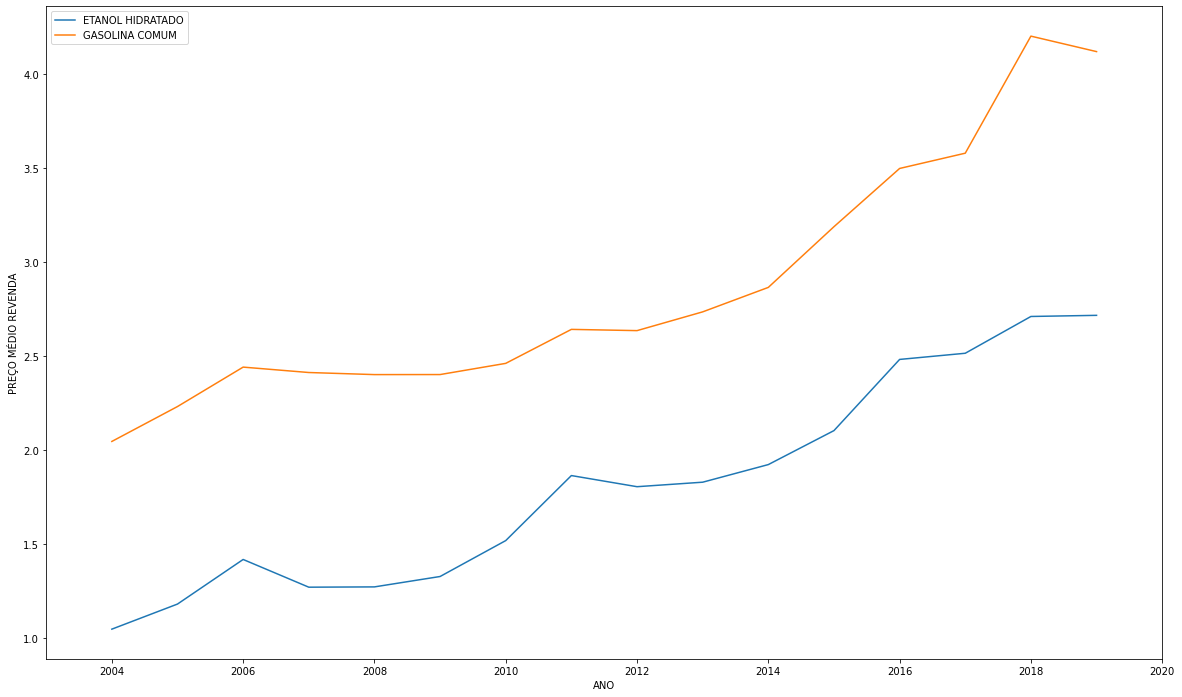

In [53]:
plt.figure(figsize=(20,12))
sns.lineplot(data=df_viz['ETANOL HIDRATADO'], label='ETANOL HIDRATADO')
sns.lineplot(data=df_viz['GASOLINA COMUM'], label='GASOLINA COMUM')
plt.xlim([df_viz.index.min() - 1, df_viz.index.max()+1])
plt.ylabel('PREÇO MÉDIO REVENDA')

In [54]:
df_viz_diff = df_viz.diff()
df_viz_diff

PRODUTO,ETANOL HIDRATADO,GASOLINA COMUM
ANO,,
2004,NaN,NaN
2005,0.133441,0.185606
2006,0.237123,0.209685
2007,-0.147411,-0.028720
2008,0.001558,-0.011077
2009,0.055271,0.000212
2010,0.190979,0.059500
2011,0.345827,0.180731
2012,-0.059224,-0.006589


Text(0, 0.5, 'PREÇO MÉDIO REVENDA')

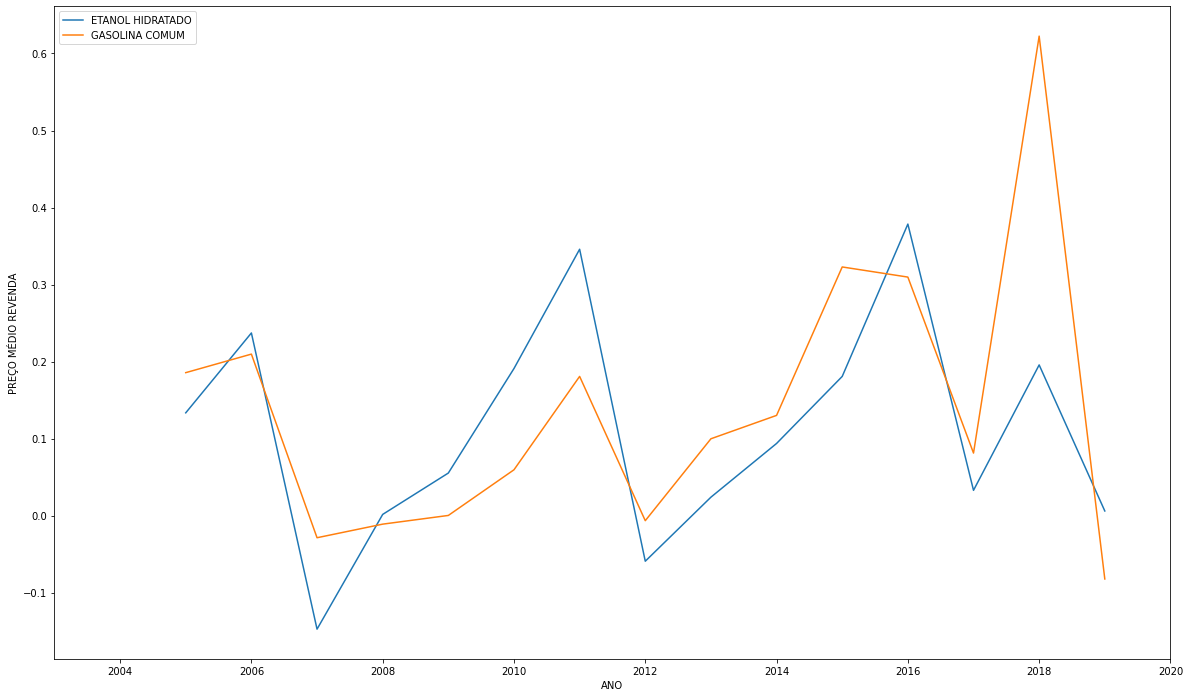

In [55]:
plt.figure(figsize=(20,12))
sns.lineplot(data=df_viz_diff['ETANOL HIDRATADO'], label='ETANOL HIDRATADO')
sns.lineplot(data=df_viz_diff['GASOLINA COMUM'], label='GASOLINA COMUM')
plt.xlim([df_viz_diff.index.min() - 1, df_viz_diff.index.max()+1])
plt.ylabel('PREÇO MÉDIO REVENDA')

(2003.0, 2020.0)

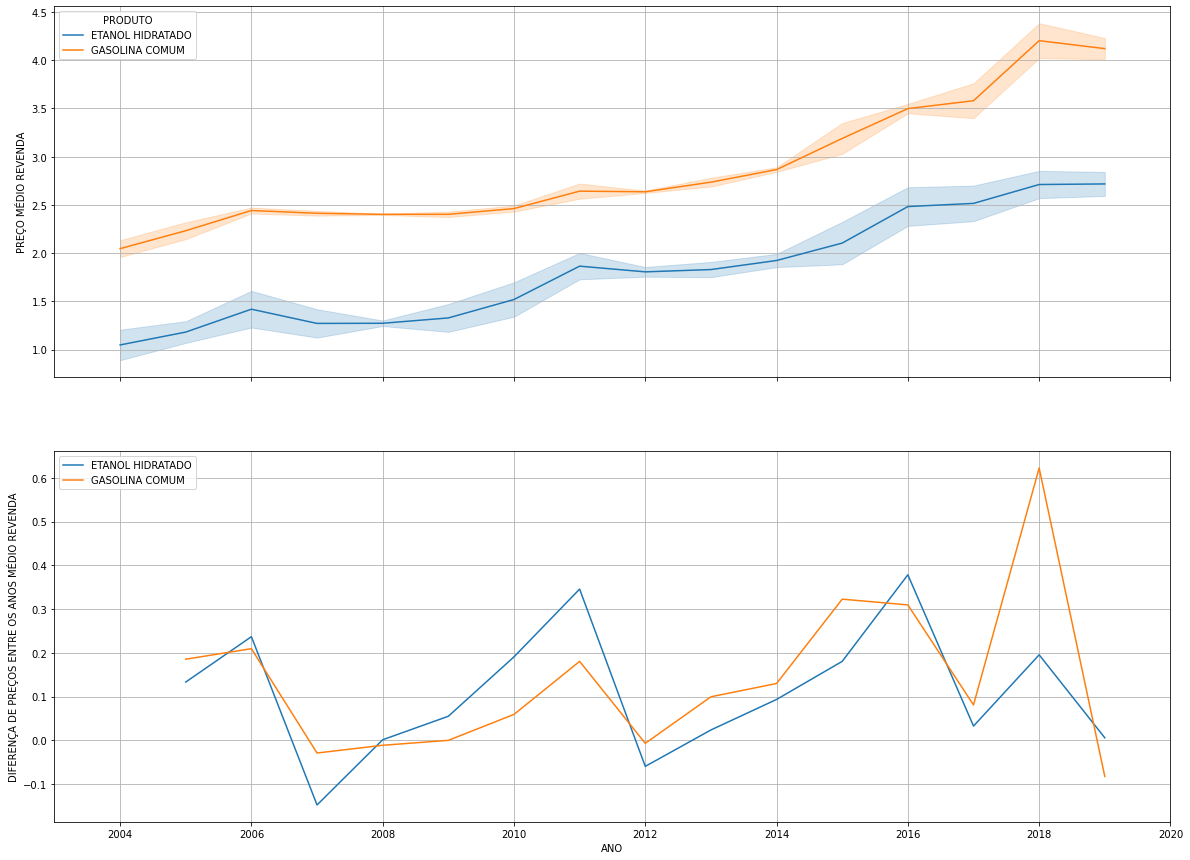

In [56]:
#subplots
fig, axes = plt.subplots(2,1,figsize=(20,15), sharex=True)
sns.lineplot(data=df, x="ANO", y="PREÇO MÉDIO REVENDA", hue="PRODUTO", ci='sd', ax=axes[0])
axes[0].set_ylabel('PREÇO MÉDIO REVENDA')
axes[0].grid(True)

sns.lineplot(data=df_viz_diff['ETANOL HIDRATADO'], label='ETANOL HIDRATADO', ax=axes[1])
sns.lineplot(data=df_viz_diff['GASOLINA COMUM'], label='GASOLINA COMUM', ax=axes[1])
axes[1].set_ylabel('DIFERENÇA DE PREÇOS ENTRE OS ANOS MÉDIO REVENDA')
axes[1].grid(True)

plt.xlim([df_viz_diff.index.min() - 1, df_viz_diff.index.max()+1])

**Boxplots**

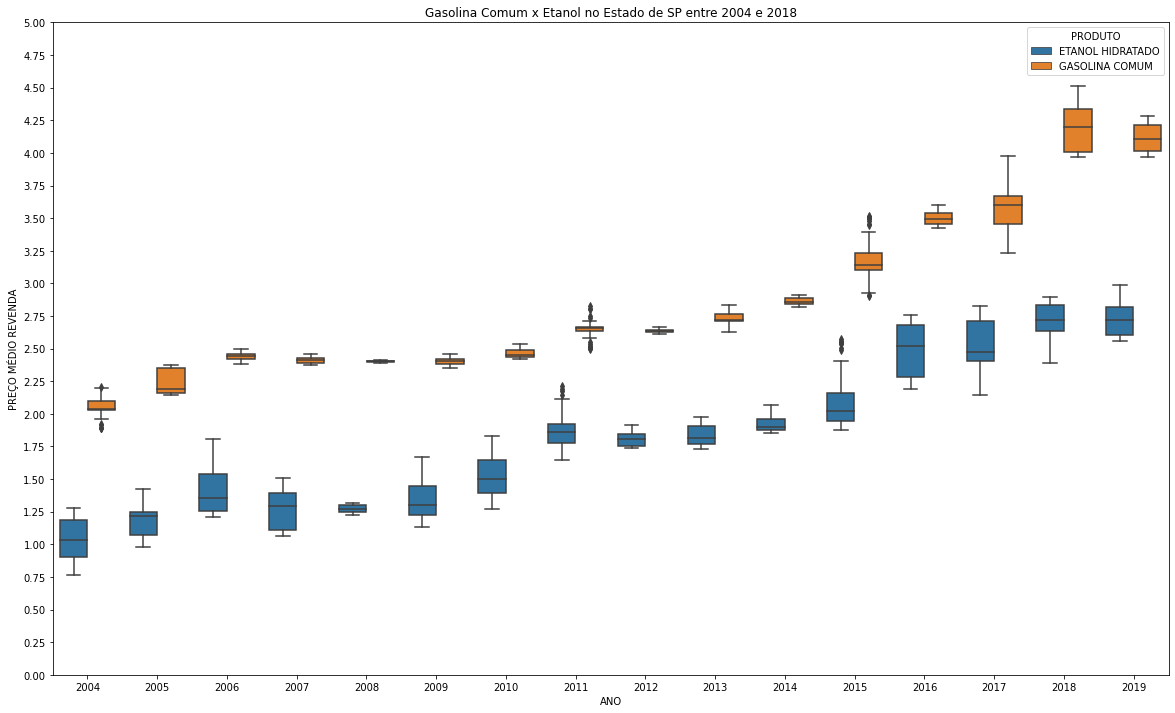

In [57]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="ANO", y='PREÇO MÉDIO REVENDA', data=df, hue='PRODUTO')
ax.set_title('Gasolina Comum x Etanol no Estado de SP entre 2004 e 2018')
ax.set_yticks(ticks_precos)

**Violin Plot**

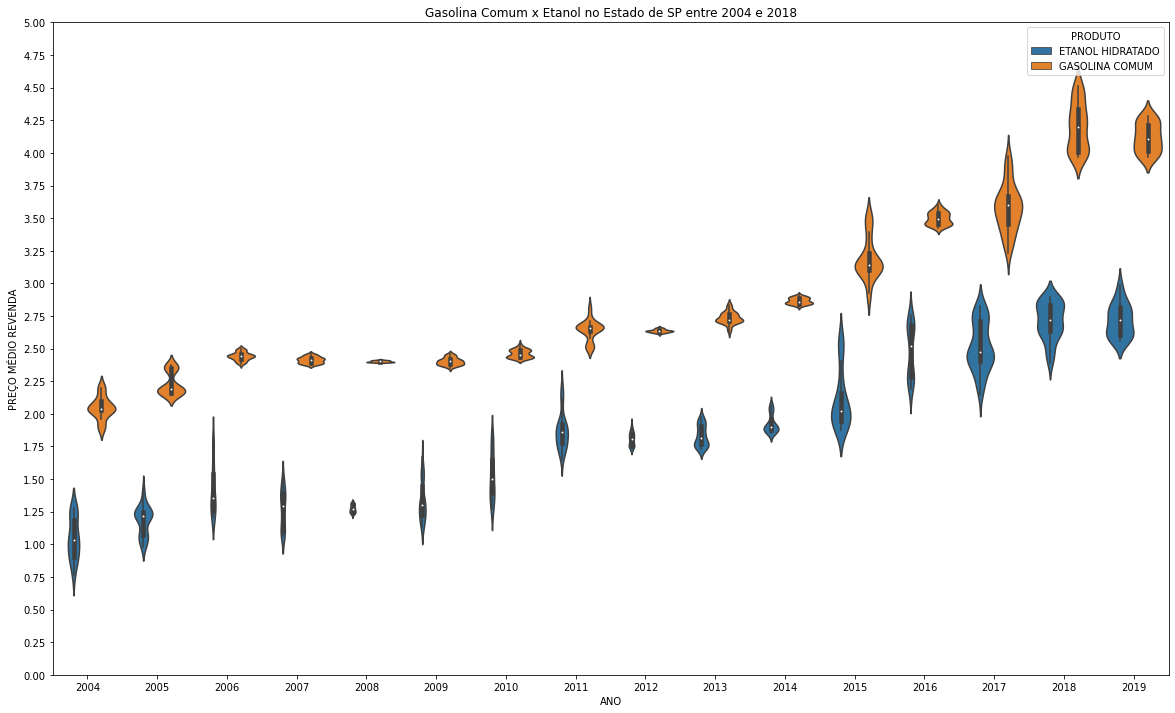

In [58]:
plt.figure(figsize=(20,12))
ax = sns.violinplot(x="ANO", y='PREÇO MÉDIO REVENDA', data=df, hue='PRODUTO')
ax.set_title('Gasolina Comum x Etanol no Estado de SP entre 2004 e 2018')
ax.set_yticks(ticks_precos)

##2.4. Há correlação entre os preços da Gasolina Comum e do Etanol do estado de SP de 2018?

In [59]:
df = data.query('ESTADO == "SAO PAULO" and PRODUTO in ["ETANOL HIDRATADO", "GASOLINA COMUM"]').reset_index(drop=True)
df

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4047,R$/l,0.768,0.085,0.590,1.150,0.198,0.111,0.570,0.056,0.42710,1.4123,0.098,5,2004
1,2004-05-16,2004-05-22,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4066,R$/l,0.766,0.083,0.590,1.150,0.190,0.108,0.576,0.050,0.43204,0.9724,0.087,5,2004
2,2004-05-23,2004-05-29,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4077,R$/l,0.823,0.071,0.620,1.199,0.209,0.086,0.614,0.063,0.34951,1.4120,0.103,5,2004
3,2004-05-30,2004-06-05,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4073,R$/l,0.887,0.075,0.639,1.359,0.216,0.085,0.671,0.075,0.33980,1.0669,0.112,5,2004
4,2004-06-06,2004-06-12,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4082,R$/l,0.894,0.071,0.669,1.199,0.205,0.079,0.689,0.072,0.47797,1.0669,0.104,6,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,2019-06-09,2019-06-15,SUDESTE,SAO PAULO,GASOLINA COMUM,1643,R$/l,4.210,0.177,3.759,4.992,0.425,0.042,3.785,0.096,3.52000,4.1007,0.025,6,2019
1566,2019-06-16,2019-06-22,SUDESTE,SAO PAULO,ETANOL HIDRATADO,1661,R$/l,2.593,0.182,2.169,3.899,0.323,0.070,2.270,0.103,1.95990,2.6680,0.045,6,2019
1567,2019-06-16,2019-06-22,SUDESTE,SAO PAULO,GASOLINA COMUM,1635,R$/l,4.168,0.177,3.679,5.199,0.443,0.042,3.725,0.096,3.50200,4.0892,0.026,6,2019
1568,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,ETANOL HIDRATADO,1662,R$/l,2.557,0.185,2.159,3.899,0.296,0.072,2.261,0.102,1.93350,2.6680,0.045,6,2019


In [60]:
df = df[['PRODUTO', 'PREÇO MÉDIO REVENDA','ANO']]
df

,PRODUTO,PREÇO MÉDIO REVENDA,ANO
0,ETANOL HIDRATADO,0.768,2004
1,ETANOL HIDRATADO,0.766,2004
2,ETANOL HIDRATADO,0.823,2004
3,ETANOL HIDRATADO,0.887,2004
4,ETANOL HIDRATADO,0.894,2004
...,...,...,...
1565,GASOLINA COMUM,4.210,2019
1566,ETANOL HIDRATADO,2.593,2019
1567,GASOLINA COMUM,4.168,2019
1568,ETANOL HIDRATADO,2.557,2019


In [61]:
df_2 = df.groupby(['PRODUTO', 'ANO']).mean().unstack(level='PRODUTO')
df_2

PREÇO MÉDIO REVENDA               
PRODUTO    ETANOL HIDRATADO GASOLINA COMUM
ANO                                       
2004               1.049059       2.047294
2005               1.182500       2.232900
2006               1.419623       2.442585
2007               1.272212       2.413865
2008               1.273769       2.402788
2009               1.329040       2.403000
2010               1.520019       2.462500
2011               1.865846       2.643231
2012               1.806623       2.636642
2013               1.830558       2.736404
2014               1.924231       2.866519
2015               2.104941       3.189353
2016               2.483442       3.499038
2017               2.516264       3.580245
2018               2.711904       4.202769
2019               2.717920       4.120480

In [62]:
df_2.columns

MultiIndex([('PREÇO MÉDIO REVENDA', 'ETANOL HIDRATADO'),
            ('PREÇO MÉDIO REVENDA',   'GASOLINA COMUM')],
           names=[None, 'PRODUTO'])

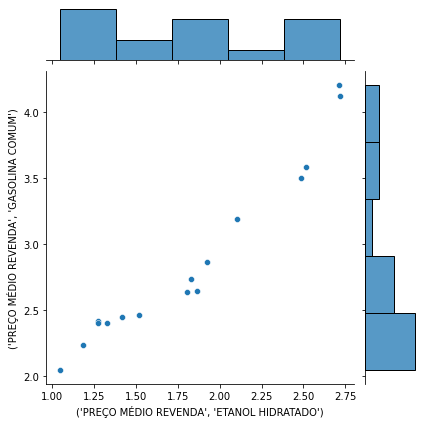

In [63]:
sns.jointplot(x=('PREÇO MÉDIO REVENDA', 'ETANOL HIDRATADO'), y=('PREÇO MÉDIO REVENDA',   'GASOLINA COMUM'), data=df_2)

##2.5. Como os preços da Gasolina Comum e do Etanol variam no estado de SP ao longo dos anos e meses? 

In [64]:
df = data.query('ESTADO == "SAO PAULO" and PRODUTO in ["ETANOL HIDRATADO", "GASOLINA COMUM"]').reset_index(drop=True)

In [65]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4047,R$/l,0.768,0.085,0.590,1.150,0.198,0.111,0.570,0.056,0.42710,1.4123,0.098,5,2004
1,2004-05-16,2004-05-22,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4066,R$/l,0.766,0.083,0.590,1.150,0.190,0.108,0.576,0.050,0.43204,0.9724,0.087,5,2004
2,2004-05-23,2004-05-29,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4077,R$/l,0.823,0.071,0.620,1.199,0.209,0.086,0.614,0.063,0.34951,1.4120,0.103,5,2004
3,2004-05-30,2004-06-05,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4073,R$/l,0.887,0.075,0.639,1.359,0.216,0.085,0.671,0.075,0.33980,1.0669,0.112,5,2004
4,2004-06-06,2004-06-12,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4082,R$/l,0.894,0.071,0.669,1.199,0.205,0.079,0.689,0.072,0.47797,1.0669,0.104,6,2004


In [66]:
df['ANO-MÊS'] = pd.to_datetime({'day': 1, 'month': df['MÊS'], 'year': df['ANO']})

In [67]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,ANO-MÊS
0,2004-05-09,2004-05-15,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4047,R$/l,0.768,0.085,0.590,1.150,0.198,0.111,0.570,0.056,0.42710,1.4123,0.098,5,2004,2004-05-01
1,2004-05-16,2004-05-22,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4066,R$/l,0.766,0.083,0.590,1.150,0.190,0.108,0.576,0.050,0.43204,0.9724,0.087,5,2004,2004-05-01
2,2004-05-23,2004-05-29,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4077,R$/l,0.823,0.071,0.620,1.199,0.209,0.086,0.614,0.063,0.34951,1.4120,0.103,5,2004,2004-05-01
3,2004-05-30,2004-06-05,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4073,R$/l,0.887,0.075,0.639,1.359,0.216,0.085,0.671,0.075,0.33980,1.0669,0.112,5,2004,2004-05-01
4,2004-06-06,2004-06-12,SUDESTE,SAO PAULO,ETANOL HIDRATADO,4082,R$/l,0.894,0.071,0.669,1.199,0.205,0.079,0.689,0.072,0.47797,1.0669,0.104,6,2004,2004-06-01


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


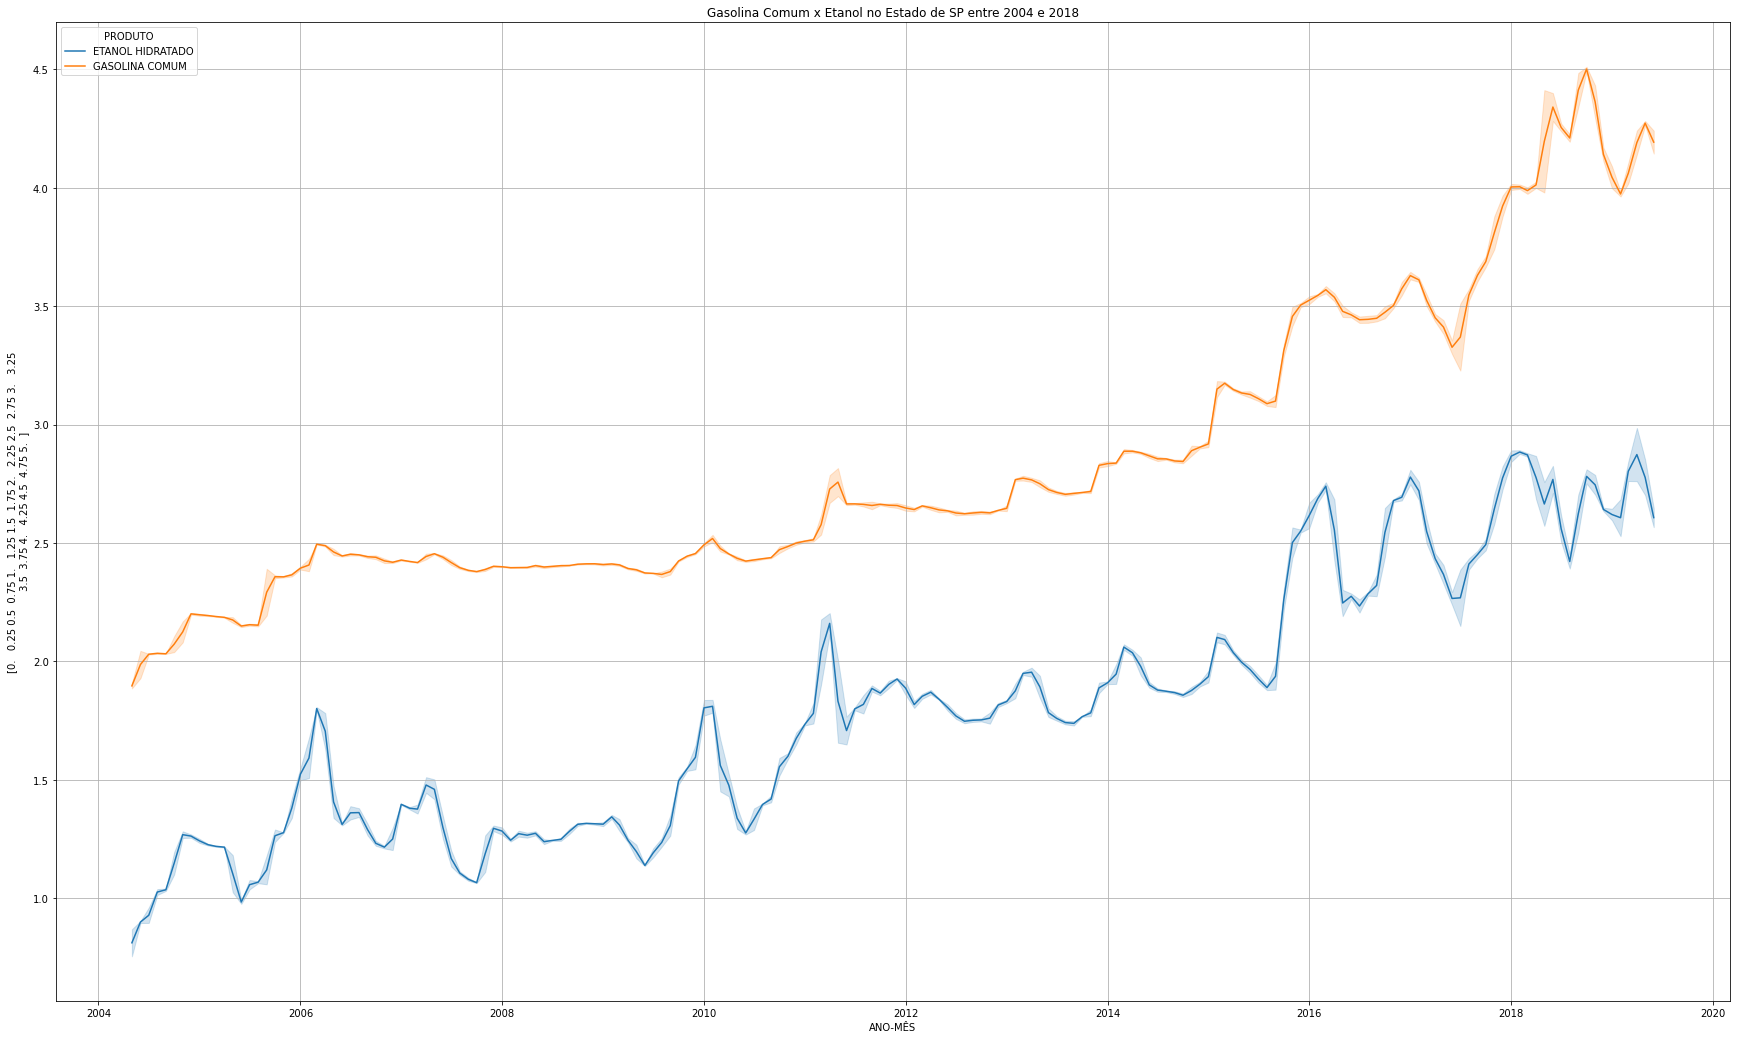

In [68]:
ticks_precos = np.arange(0.0, 5.01, 0.25)

plt.figure(figsize=(30,18))
ax = sns.lineplot(x="ANO-MÊS", y='PREÇO MÉDIO REVENDA', ci='sd', data=df, hue="PRODUTO")
ax.set_title('Gasolina Comum x Etanol no Estado de SP entre 2004 e 2018')
ax.set_ylabel(ticks_precos)
plt.grid()

In [69]:
datas_unicas = df['ANO-MÊS'].unique()
datas_unicas

array(['2004-05-01T00:00:00.000000000', '2004-06-01T00:00:00.000000000',
       '2004-07-01T00:00:00.000000000', '2004-08-01T00:00:00.000000000',
       '2004-09-01T00:00:00.000000000', '2004-10-01T00:00:00.000000000',
       '2004-11-01T00:00:00.000000000', '2004-12-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2005-02-01T00:00:00.000000000',
       '2005-03-01T00:00:00.000000000', '2005-04-01T00:00:00.000000000',
       '2005-05-01T00:00:00.000000000', '2005-06-01T00:00:00.000000000',
       '2005-07-01T00:00:00.000000000', '2005-08-01T00:00:00.000000000',
       '2005-09-01T00:00:00.000000000', '2005-10-01T00:00:00.000000000',
       '2005-11-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-06-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2006-08-01

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


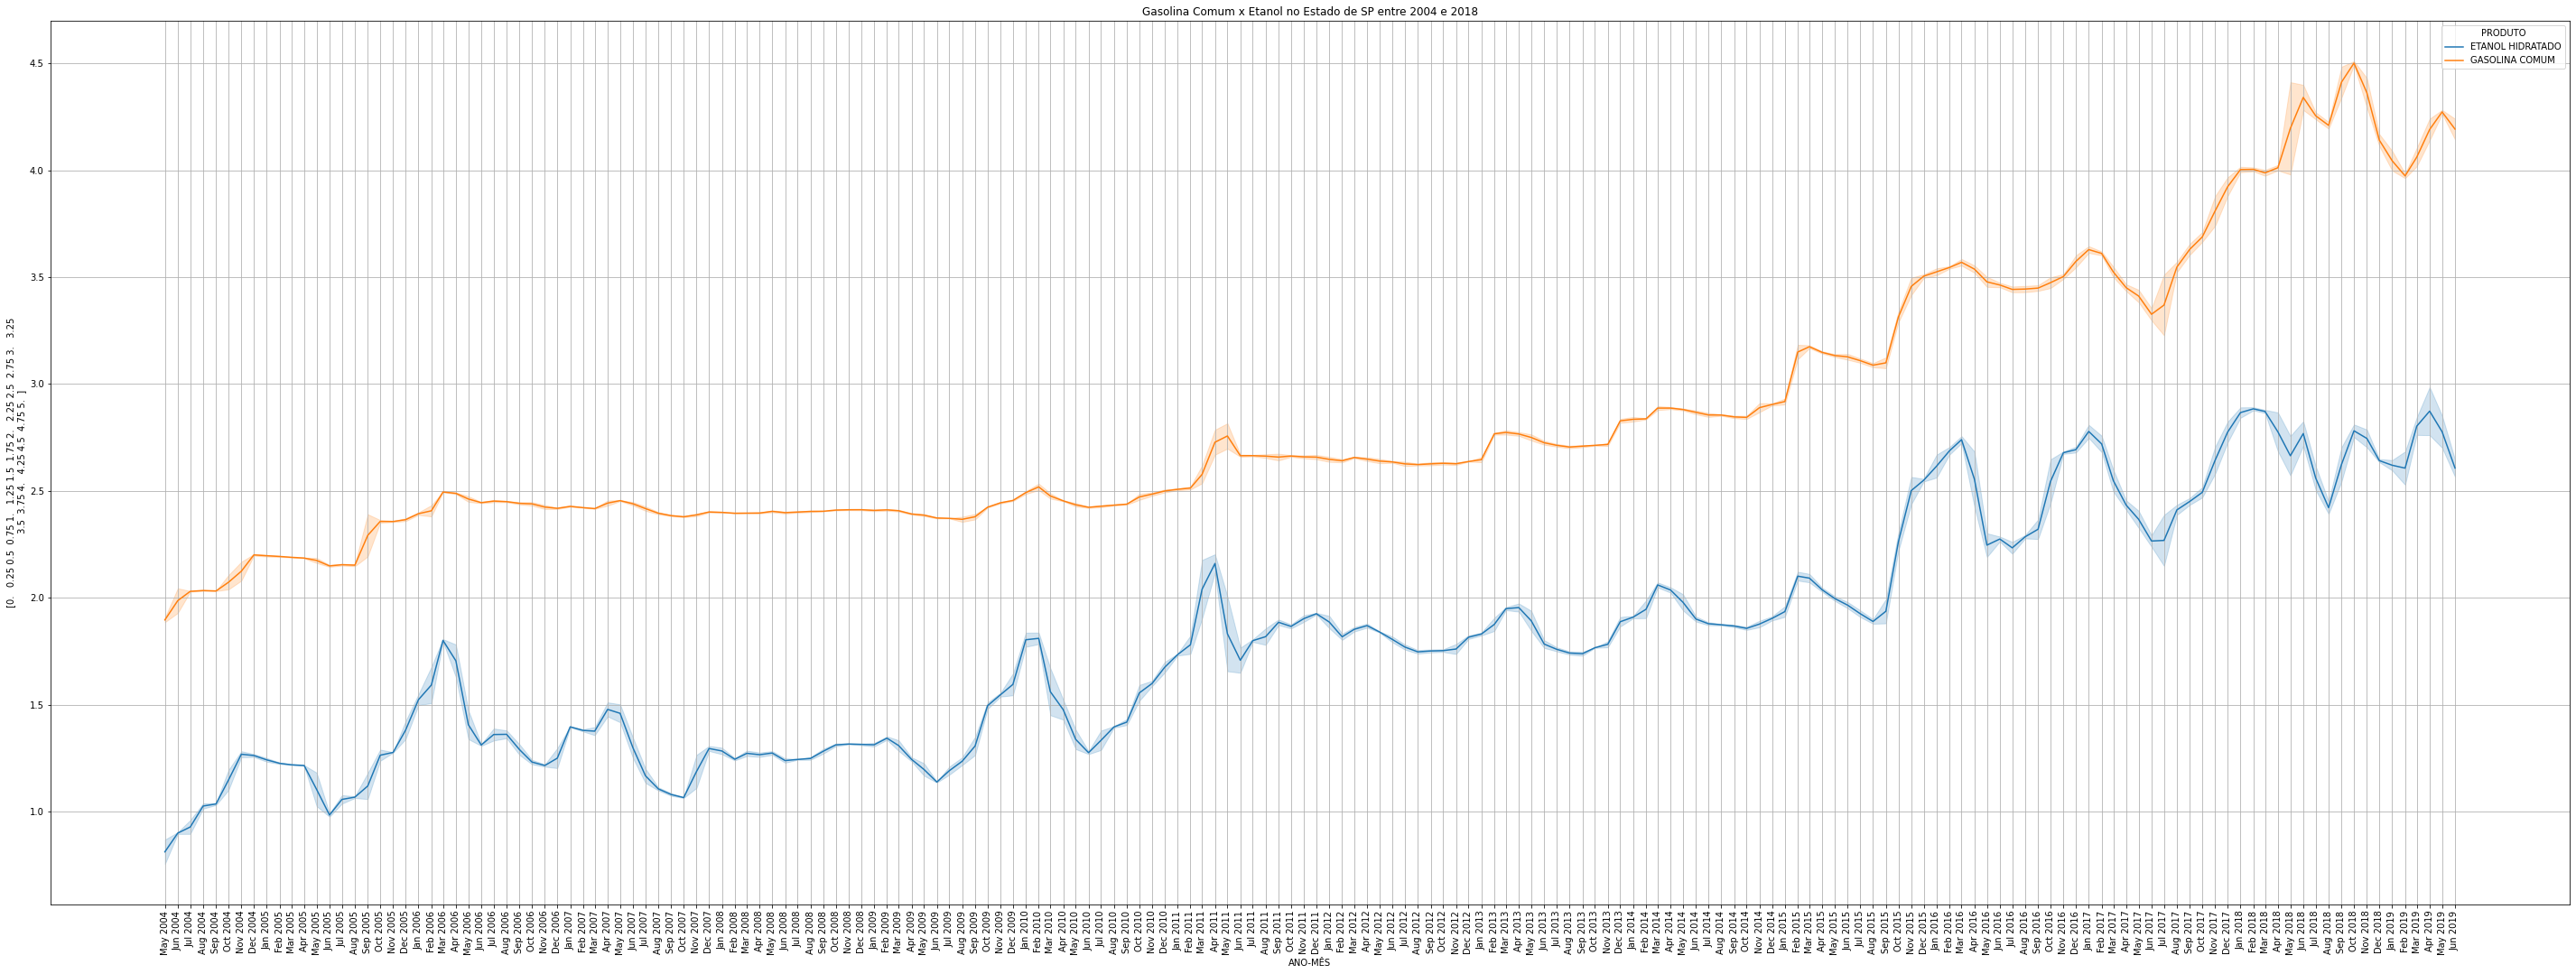

In [70]:
import matplotlib.dates as mdates

ticks_precos = np.arange(0.0, 5.01, 0.25)

plt.figure(figsize=(50,18))
ax = sns.lineplot(x="ANO-MÊS", y='PREÇO MÉDIO REVENDA', ci='sd', data=df, hue="PRODUTO")
ax.set_title('Gasolina Comum x Etanol no Estado de SP entre 2004 e 2018')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_xticks(datas_unicas)
ax.set_ylabel(ticks_precos)
plt.xticks(rotation=90)
plt.grid()

In [71]:
min_data = datas_unicas.min()
max_data = datas_unicas.max()

xticks = pd.date_range(datas_unicas.min(), datas_unicas.max(), periods=25).to_pydatetime()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


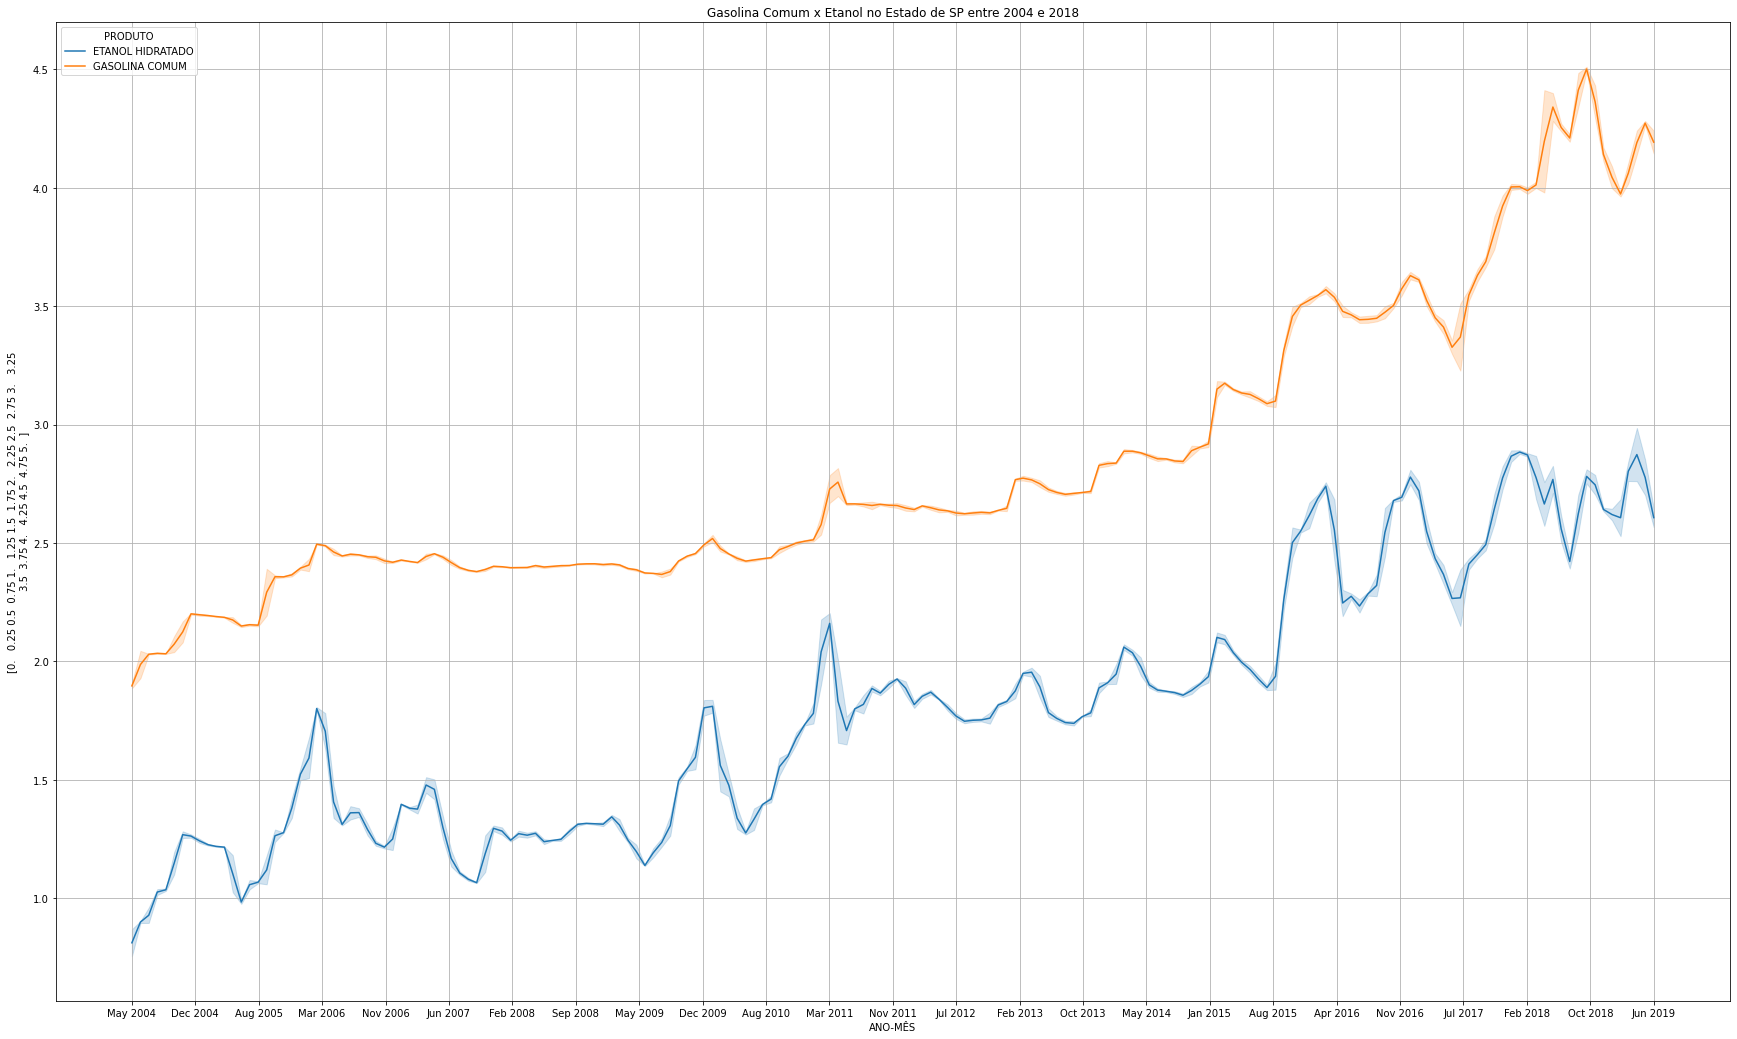

In [72]:
import matplotlib.dates as mdates

ticks_precos = np.arange(0.0, 5.01, 0.25)

plt.figure(figsize=(30,18))
ax = sns.lineplot(x="ANO-MÊS", y='PREÇO MÉDIO REVENDA', ci='sd', data=df, hue="PRODUTO")
ax.set_title('Gasolina Comum x Etanol no Estado de SP entre 2004 e 2018')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_xticks(xticks)
ax.set_ylabel(ticks_precos)
plt.grid()

**Correlação entre os Preços da Gasolina e Etanol no Estado de SP**

In [73]:
df_2 = df[['PRODUTO', 'PREÇO MÉDIO REVENDA', 'ANO-MÊS']]
df_2

,PRODUTO,PREÇO MÉDIO REVENDA,ANO-MÊS
0,ETANOL HIDRATADO,0.768,2004-05-01
1,ETANOL HIDRATADO,0.766,2004-05-01
2,ETANOL HIDRATADO,0.823,2004-05-01
3,ETANOL HIDRATADO,0.887,2004-05-01
4,ETANOL HIDRATADO,0.894,2004-06-01
...,...,...,...
1565,GASOLINA COMUM,4.210,2019-06-01
1566,ETANOL HIDRATADO,2.593,2019-06-01
1567,GASOLINA COMUM,4.168,2019-06-01
1568,ETANOL HIDRATADO,2.557,2019-06-01


In [74]:
df_2 = df_2.groupby(['PRODUTO','ANO-MÊS']).mean().unstack(level='PRODUTO')
df_2

PREÇO MÉDIO REVENDA               
PRODUTO       ETANOL HIDRATADO GASOLINA COMUM
ANO-MÊS                                      
2004-05-01             0.81100        1.89625
2004-06-01             0.89875        1.98650
2004-07-01             0.92725        2.03000
2004-08-01             1.02540        2.03380
2004-09-01             1.03500        2.03175
...                        ...            ...
2019-02-01             2.60650        3.97400
2019-03-01             2.80280        4.06180
2019-04-01             2.87325        4.19100
2019-05-01             2.77675        4.27325
2019-06-01             2.60700        4.19300

[182 rows x 2 columns]

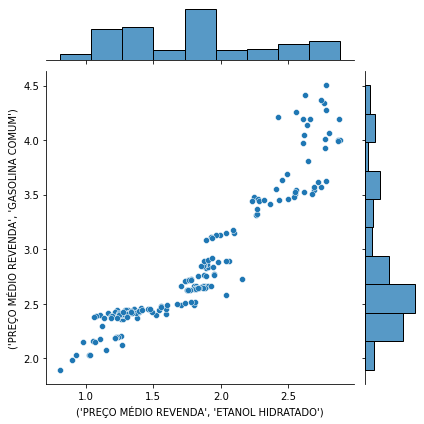

In [75]:
sns.jointplot(x=('PREÇO MÉDIO REVENDA', 'ETANOL HIDRATADO'), y = ('PREÇO MÉDIO REVENDA', 'GASOLINA COMUM'), data=df_2)

In [76]:
df_2.corr()

PREÇO MÉDIO REVENDA               
PRODUTO                                 ETANOL HIDRATADO GASOLINA COMUM
                    PRODUTO                                            
PREÇO MÉDIO REVENDA ETANOL HIDRATADO            1.000000       0.940635
                    GASOLINA COMUM              0.940635       1.000000

##2.6. Preços dos Combustíveis por Região ao longo dos anos e meses?

Uma alternativa

In [77]:
data.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


In [78]:
#juntando os meses e anos em uma data só
data['ANO-MÊS'] = pd.to_datetime({'day': 1, 'month': data['MÊS'], 'year': data['ANO']})

In [79]:
data.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,ANO-MÊS
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004,2004-05-01
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004,2004-05-01
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004,2004-05-01
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004,2004-05-01
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004,2004-05-01


In [80]:
data['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

Text(0.5, 1.0, 'PREÇO DO ÓLEO DIESEL S10 COMUM AO LONGO DOS ANOS')

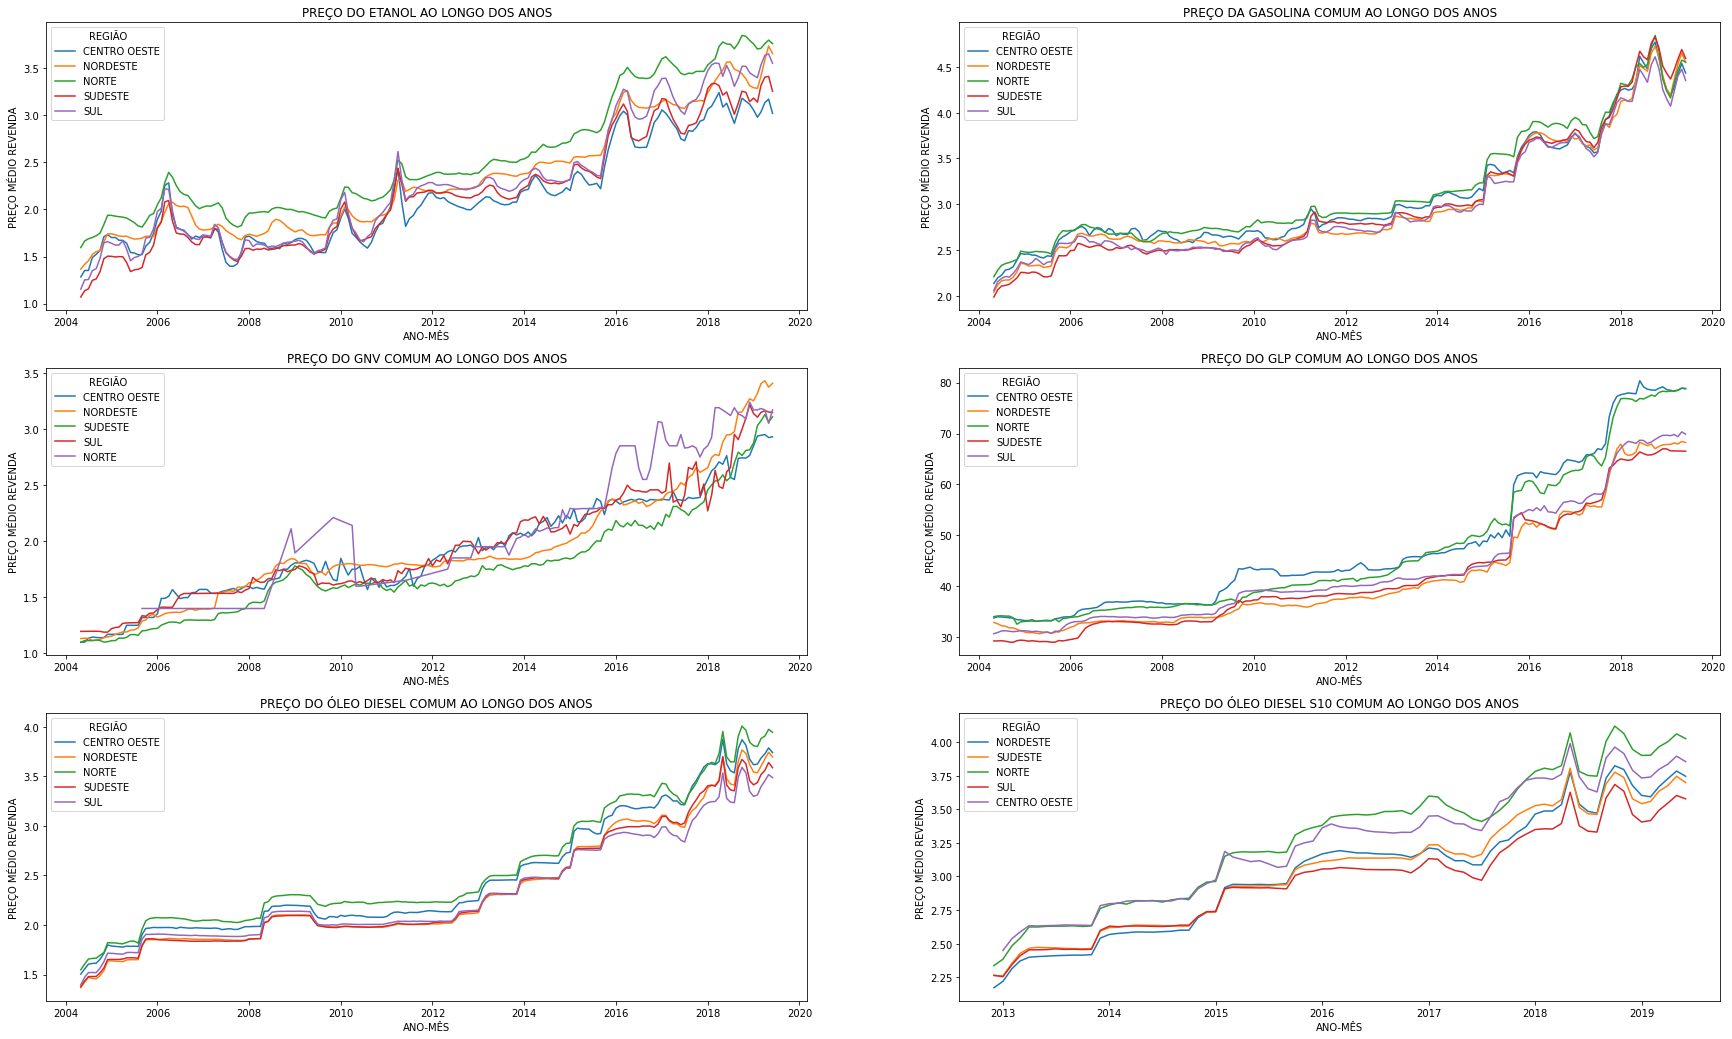

In [81]:
fig, axes = plt.subplots(3, 2, figsize=(30, 18))

sns.lineplot(data=data.query('PRODUTO == "ETANOL HIDRATADO"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'REGIÃO', ci=None, ax=axes[0, 0])
axes[0,0].set_title('PREÇO DO ETANOL AO LONGO DOS ANOS')

sns.lineplot(data=data.query('PRODUTO == "GASOLINA COMUM"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'REGIÃO', ci=None, ax=axes[0, 1])
axes[0,1].set_title('PREÇO DA GASOLINA COMUM AO LONGO DOS ANOS')

sns.lineplot(data=data.query('PRODUTO == "GNV"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'REGIÃO', ci=None, ax=axes[1, 0])
axes[1,0].set_title('PREÇO DO GNV COMUM AO LONGO DOS ANOS')

sns.lineplot(data=data.query('PRODUTO == "GLP"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'REGIÃO', ci=None, ax=axes[1, 1])
axes[1,1].set_title('PREÇO DO GLP COMUM AO LONGO DOS ANOS')

sns.lineplot(data=data.query('PRODUTO == "ÓLEO DIESEL"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'REGIÃO', ci=None, ax=axes[2, 0])
axes[2,0].set_title('PREÇO DO ÓLEO DIESEL COMUM AO LONGO DOS ANOS')

sns.lineplot(data=data.query('PRODUTO == "ÓLEO DIESEL S10"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'REGIÃO', ci=None, ax=axes[2, 1])
axes[2,1].set_title('PREÇO DO ÓLEO DIESEL S10 COMUM AO LONGO DOS ANOS')

No geral, a região **Norte** é a que apresenta os maiores preços de combustíveis no país 

**Outra Alternativa**

Text(0.5, 1.0, 'PREÇO DOS COMBUSTÍVEIS NA REGIÃO SUL')

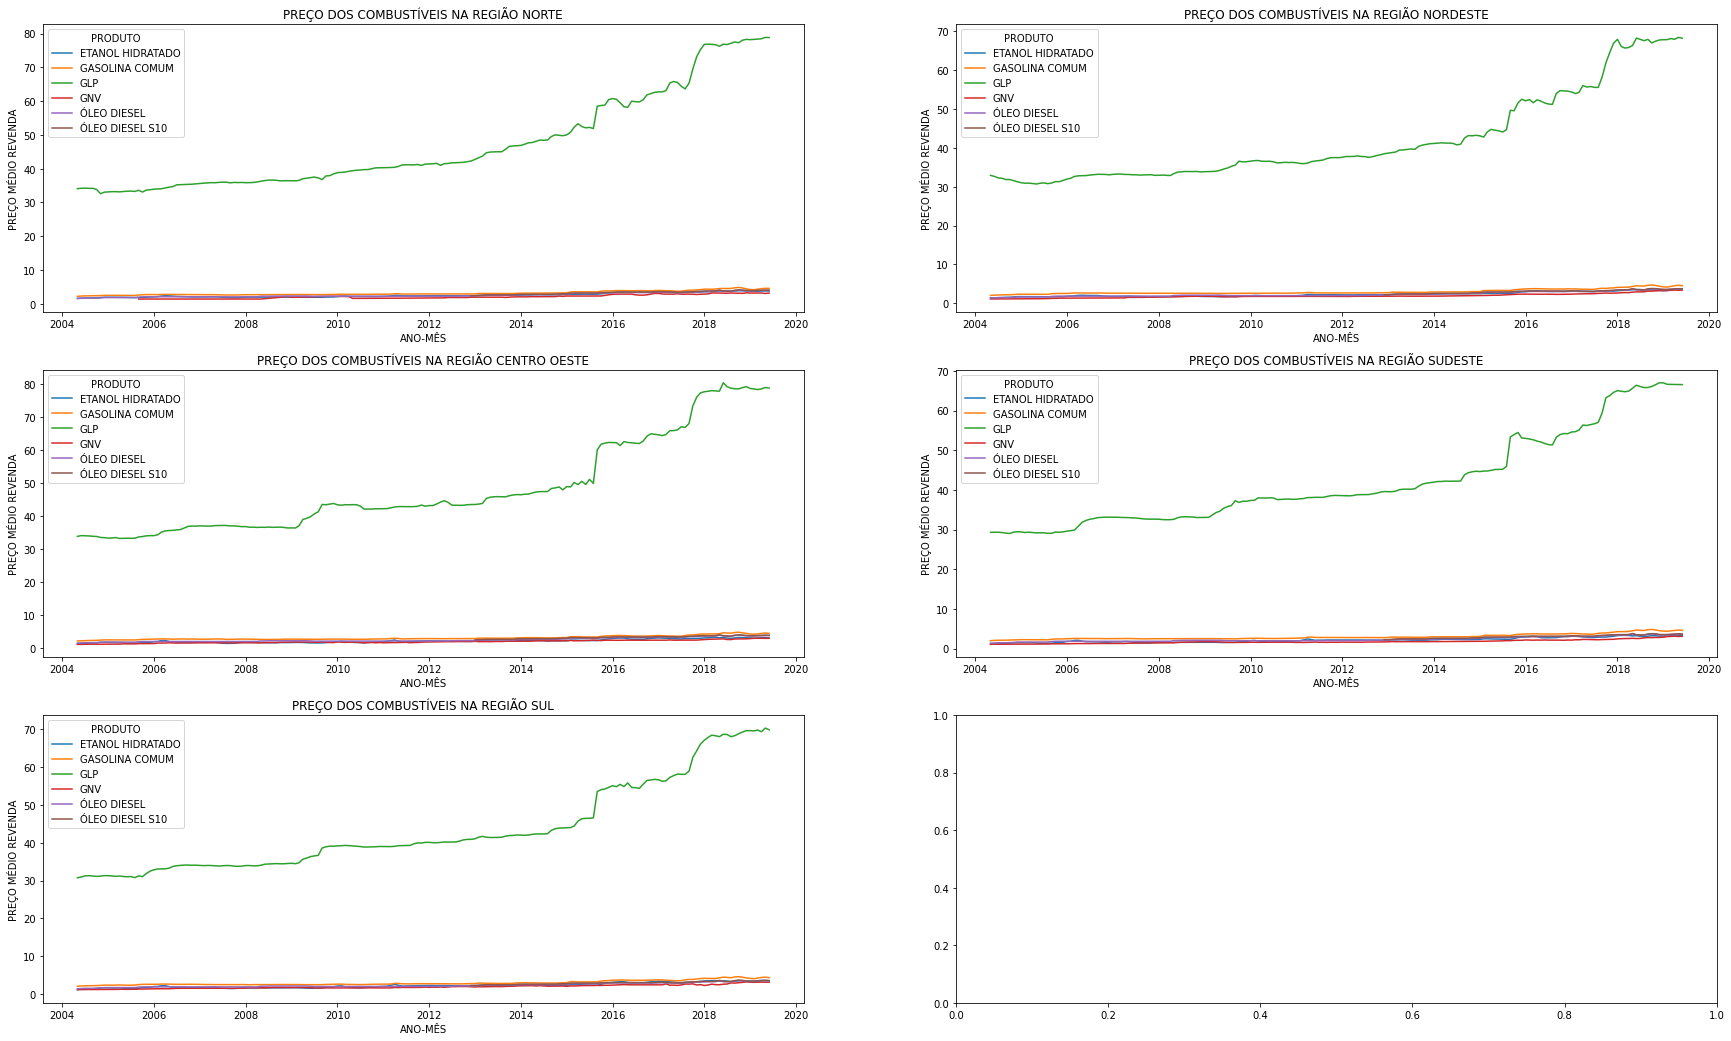

In [82]:
fig, axes = plt.subplots(3, 2, figsize=(30, 18))

sns.lineplot(data=data.query('REGIÃO == "NORTE"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[0, 0])
axes[0,0].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO NORTE')

sns.lineplot(data=data.query('REGIÃO == "NORDESTE"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[0, 1])
axes[0,1].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO NORDESTE')

sns.lineplot(data=data.query('REGIÃO == "CENTRO OESTE"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[1, 0])
axes[1,0].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO CENTRO OESTE')

sns.lineplot(data=data.query('REGIÃO == "SUDESTE"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[1, 1])
axes[1,1].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO SUDESTE')

sns.lineplot(data=data.query('REGIÃO == "SUL"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[2, 0])
axes[2,0].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO SUL')

Como o preço do GLP é muito discrepante do preço dos demais combustíveis, a análise fica totalmente prejudicada.

Podemos ignorar o GLP neste momento e comparar os preços entre os outros combustíveis

In [83]:
df = data.query('PRODUTO != "GLP"')

Text(0.5, 1.0, 'PREÇO DOS COMBUSTÍVEIS NA REGIÃO SUL')

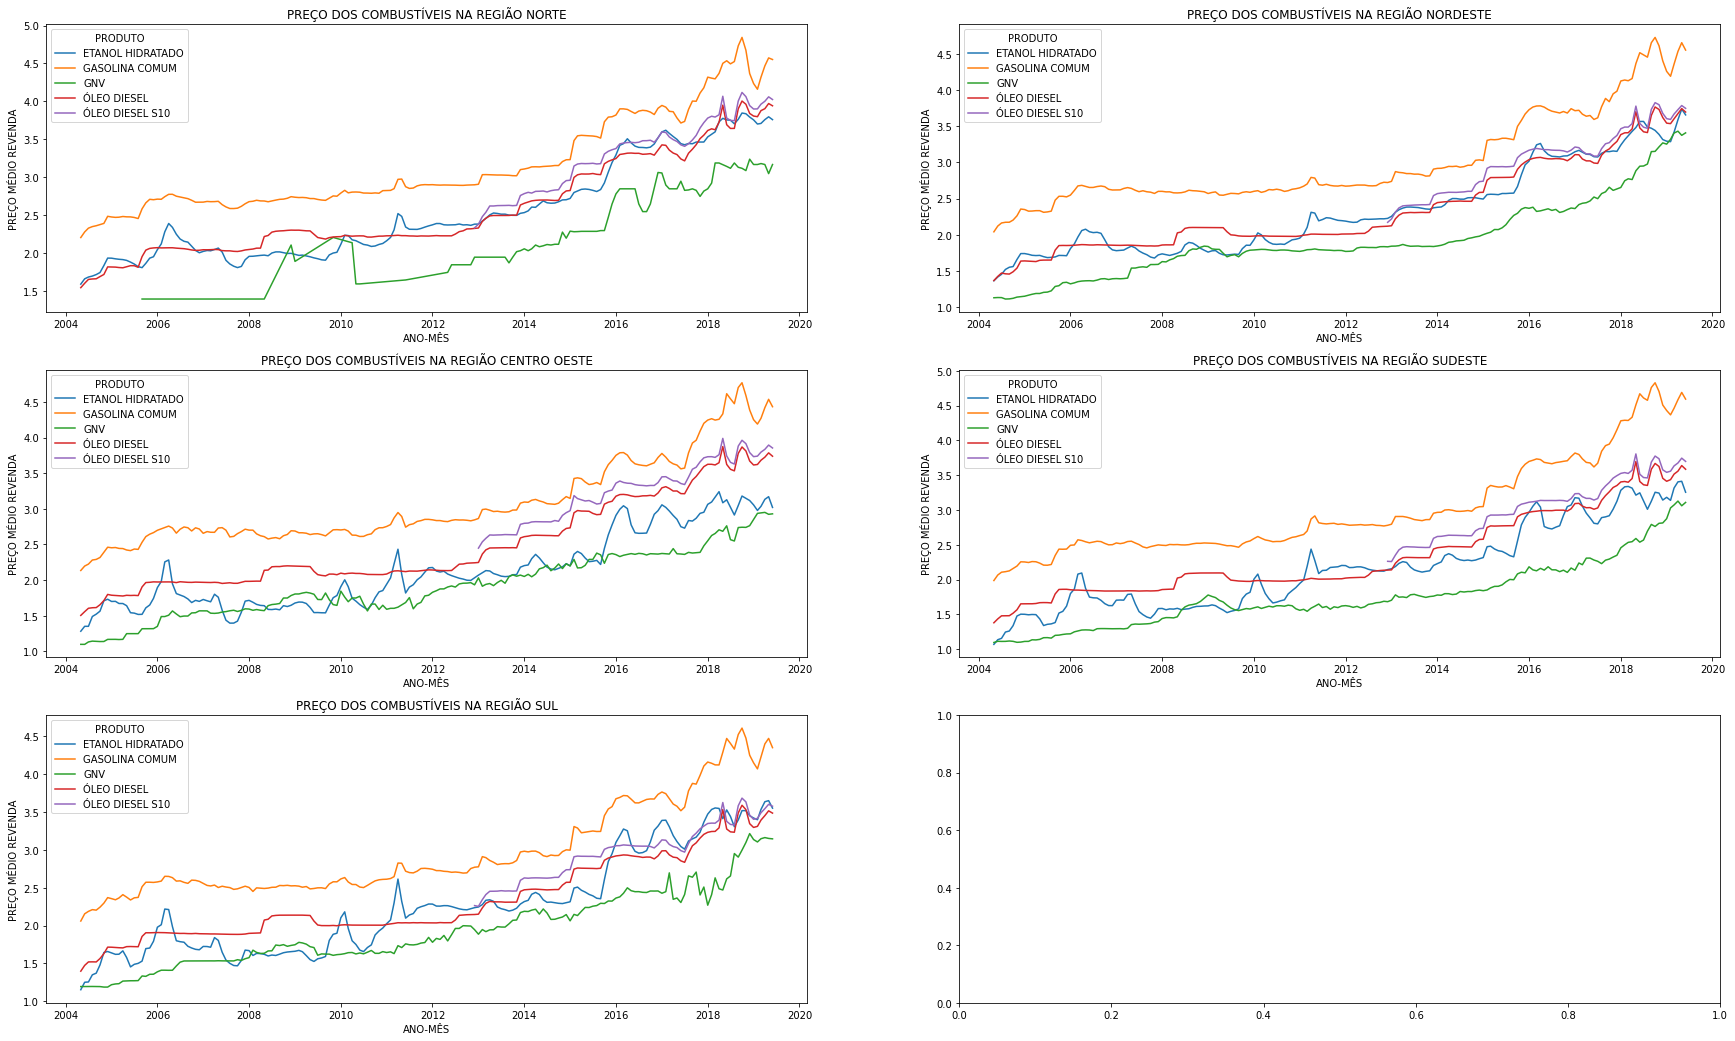

In [84]:
fig, axes = plt.subplots(3, 2, figsize=(30, 18))

sns.lineplot(data=df.query('REGIÃO == "NORTE"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[0, 0])
axes[0,0].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO NORTE')

sns.lineplot(data=df.query('REGIÃO == "NORDESTE"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[0, 1])
axes[0,1].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO NORDESTE')

sns.lineplot(data=df.query('REGIÃO == "CENTRO OESTE"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[1, 0])
axes[1,0].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO CENTRO OESTE')

sns.lineplot(data=df.query('REGIÃO == "SUDESTE"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[1, 1])
axes[1,1].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO SUDESTE')

sns.lineplot(data=df.query('REGIÃO == "SUL"'), x='ANO-MÊS', y='PREÇO MÉDIO REVENDA', hue = 'PRODUTO', ci=None, ax=axes[2, 0])
axes[2,0].set_title('PREÇO DOS COMBUSTÍVEIS NA REGIÃO SUL')

##2.7. Comportamento dos Preços dos Combustíveis dos Estados do Norte?

In [85]:
data.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,ANO-MÊS
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004,2004-05-01
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004,2004-05-01
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004,2004-05-01
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004,2004-05-01
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004,2004-05-01


In [86]:
data_norte = data.query('REGIÃO == "NORTE"')
data_norte.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,ANO-MÊS
13,2004-05-09,2004-05-15,NORTE,ACRE,ETANOL HIDRATADO,33,R$/l,1.805,0.134,1.50,1.98,0.689,0.074,1.116,0.171,0.7670,1.2992,0.153,5,2004,2004-05-01
14,2004-05-09,2004-05-15,NORTE,AMAPA,ETANOL HIDRATADO,15,R$/l,1.785,0.035,1.74,1.85,0.412,0.020,1.373,0.167,0.8339,1.4912,0.122,5,2004,2004-05-01
15,2004-05-09,2004-05-15,NORTE,AMAZONAS,ETANOL HIDRATADO,53,R$/l,1.578,0.123,1.28,1.85,0.441,0.078,1.137,0.068,0.9515,1.2109,0.060,5,2004,2004-05-01
16,2004-05-09,2004-05-15,NORTE,PARA,ETANOL HIDRATADO,104,R$/l,1.914,0.246,1.27,2.40,0.536,0.129,1.378,0.237,0.7564,1.8908,0.172,5,2004,2004-05-01
17,2004-05-09,2004-05-15,NORTE,RONDONIA,ETANOL HIDRATADO,97,R$/l,1.545,0.141,1.25,1.99,0.533,0.091,1.012,0.149,0.5200,1.3306,0.147,5,2004,2004-05-01


Text(0.5, 1.0, 'PREÇO DO ETANOL NOS ESTADOS DO NORTE')

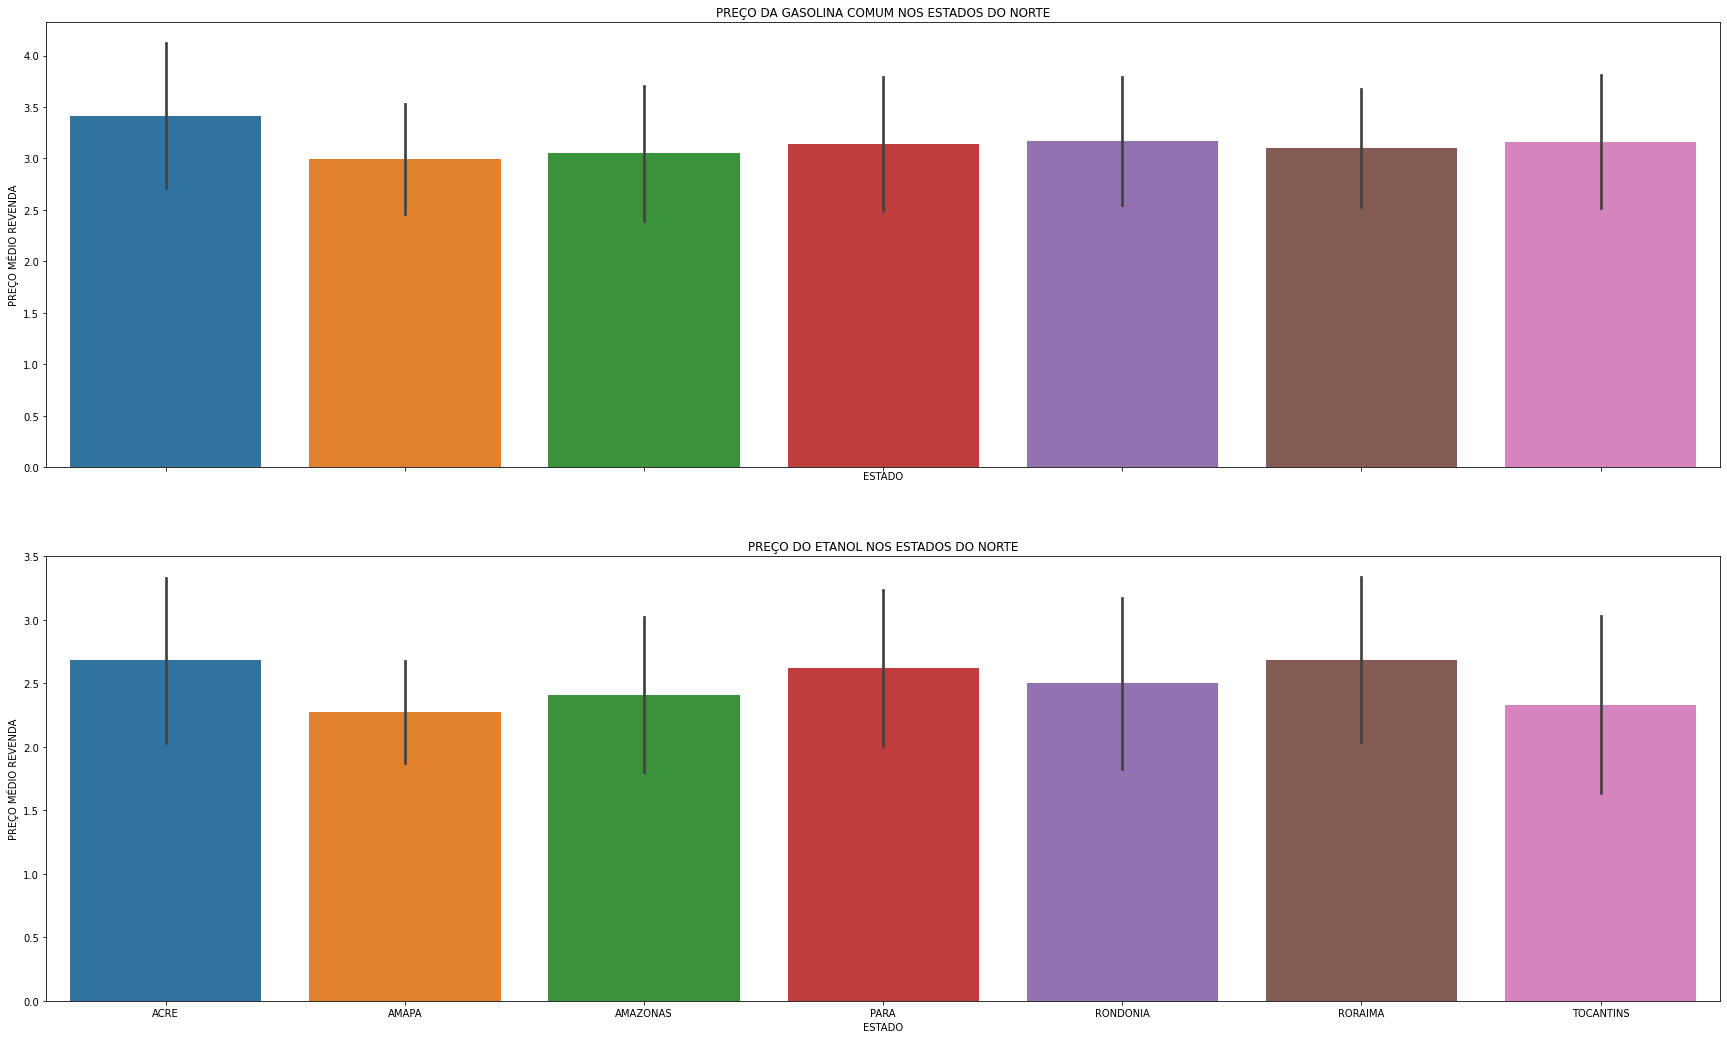

In [87]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(30, 18))

sns.barplot(data=data_norte.query('PRODUTO == "GASOLINA COMUM"'), x='ESTADO', y='PREÇO MÉDIO REVENDA', ci='sd', ax=axes[0])
axes[0].set_title('PREÇO DA GASOLINA COMUM NOS ESTADOS DO NORTE')

sns.barplot(data=data_norte.query('PRODUTO == "ETANOL HIDRATADO"'), x='ESTADO', y='PREÇO MÉDIO REVENDA', ci='sd', ax=axes[1])
axes[1].set_title('PREÇO DO ETANOL NOS ESTADOS DO NORTE')

Na média, o estado do **Acre** apresentou os preços mais caros para a Gasolina Comum e o Etanol considerando os anos de 2004 a 2018

**Analisando os preços ano a ano**

Text(0.5, 1.0, 'PREÇO DO ETANOL NOS ESTADOS DO NORTE')

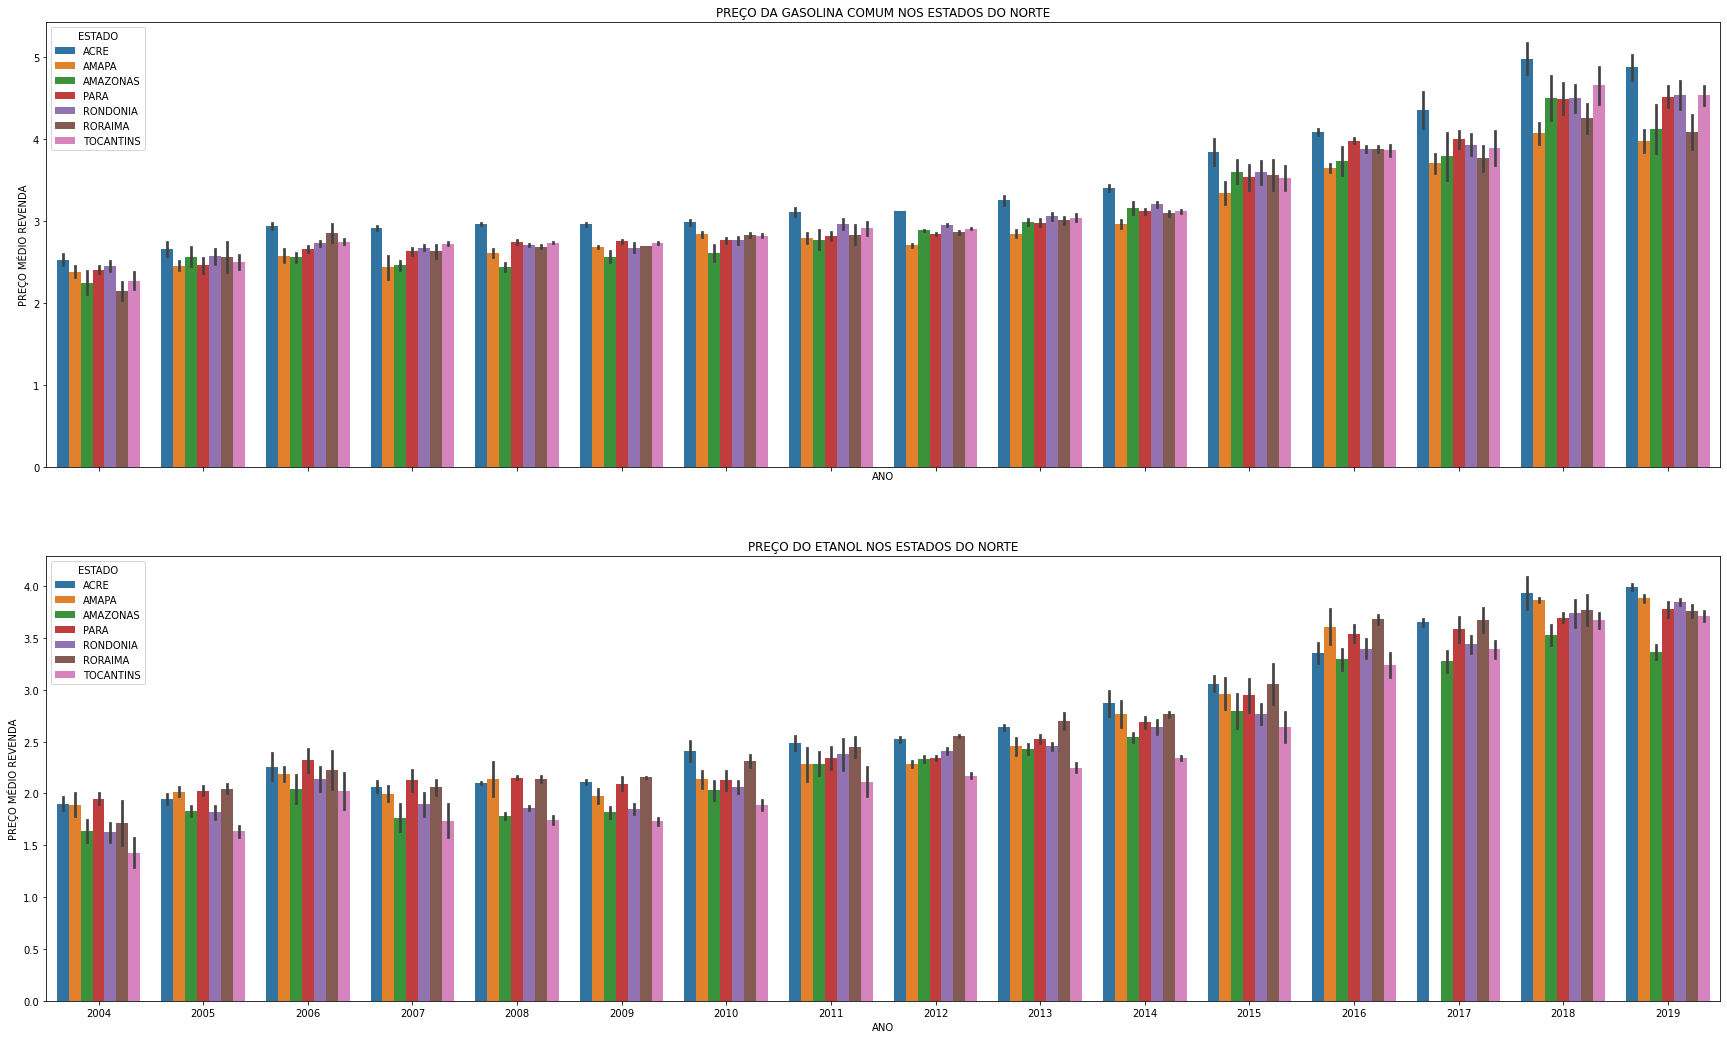

In [95]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(30, 18))

sns.barplot(data=data_norte.query('PRODUTO == "GASOLINA COMUM"'), x='ANO', y='PREÇO MÉDIO REVENDA', hue='ESTADO', ci='sd', ax=axes[0])
axes[0].set_title('PREÇO DA GASOLINA COMUM NOS ESTADOS DO NORTE')

sns.barplot(data=data_norte.query('PRODUTO == "ETANOL HIDRATADO"'), x='ANO', y='PREÇO MÉDIO REVENDA', hue='ESTADO', ci='sd', ax=axes[1])
axes[1].set_title('PREÇO DO ETANOL NOS ESTADOS DO NORTE')

In [102]:
data_norte_gasol_etan = data_norte.query('PRODUTO in ["GASOLINA COMUM", "ETANOL HIDRATADO"]')
data_norte_gasol_etan

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,ANO-MÊS
13,2004-05-09,2004-05-15,NORTE,ACRE,ETANOL HIDRATADO,33,R$/l,1.805,0.134,1.500,1.98,0.689,0.074,1.116,0.171,0.7670,1.2992,0.153,5,2004,2004-05-01
14,2004-05-09,2004-05-15,NORTE,AMAPA,ETANOL HIDRATADO,15,R$/l,1.785,0.035,1.740,1.85,0.412,0.020,1.373,0.167,0.8339,1.4912,0.122,5,2004,2004-05-01
15,2004-05-09,2004-05-15,NORTE,AMAZONAS,ETANOL HIDRATADO,53,R$/l,1.578,0.123,1.280,1.85,0.441,0.078,1.137,0.068,0.9515,1.2109,0.060,5,2004,2004-05-01
16,2004-05-09,2004-05-15,NORTE,PARA,ETANOL HIDRATADO,104,R$/l,1.914,0.246,1.270,2.40,0.536,0.129,1.378,0.237,0.7564,1.8908,0.172,5,2004,2004-05-01
17,2004-05-09,2004-05-15,NORTE,RONDONIA,ETANOL HIDRATADO,97,R$/l,1.545,0.141,1.250,1.99,0.533,0.091,1.012,0.149,0.5200,1.3306,0.147,5,2004,2004-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106757,2019-06-23,2019-06-29,NORTE,AMAZONAS,GASOLINA COMUM,73,R$/l,4.568,0.177,4.200,5.00,0.860,0.039,3.708,0.145,3.5700,4.1500,0.039,6,2019,2019-06-01
106767,2019-06-23,2019-06-29,NORTE,PARA,GASOLINA COMUM,113,R$/l,4.648,0.294,4.169,5.45,0.598,0.063,4.050,0.106,3.8706,4.3704,0.026,6,2019,2019-06-01
106775,2019-06-23,2019-06-29,NORTE,RONDONIA,GASOLINA COMUM,71,R$/l,4.607,0.148,4.370,5.00,0.630,0.032,3.977,0.069,3.7860,4.0950,0.017,6,2019,2019-06-01
106776,2019-06-23,2019-06-29,NORTE,RORAIMA,GASOLINA COMUM,13,R$/l,4.156,0.010,4.140,4.17,0.444,0.002,3.712,0.060,3.6469,3.8250,0.016,6,2019,2019-06-01


In [103]:
df_norte_gasol_etan = data_norte_gasol_etan.groupby(['ANO', 'PRODUTO', 'ESTADO']).mean().reset_index()
df_norte_gasol_etan

,ANO,PRODUTO,ESTADO,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS
0,2004,ETANOL HIDRATADO,ACRE,33.294118,1.900735,0.111706,1.688529,2.191176,0.570647,0.059088,1.330088,0.201206,0.927035,1.602700,0.150794,8.529412
1,2004,ETANOL HIDRATADO,AMAPA,12.382353,1.892882,0.096265,1.773235,2.051735,0.382471,0.050971,1.510412,0.136118,1.281446,1.729482,0.089971,8.529412
2,2004,ETANOL HIDRATADO,AMAZONAS,57.500000,1.637471,0.091118,1.417735,1.845324,0.399118,0.055853,1.238353,0.087000,1.063262,1.453282,0.069765,8.529412
3,2004,ETANOL HIDRATADO,PARA,107.058824,1.950971,0.192794,1.510000,2.342765,0.432882,0.099235,1.518088,0.180529,0.926871,1.861456,0.121029,8.529412
4,2004,ETANOL HIDRATADO,RONDONIA,95.882353,1.625059,0.125912,1.346176,2.006176,0.415412,0.078147,1.209647,0.108647,0.882397,1.438065,0.092029,8.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2019,GASOLINA COMUM,AMAZONAS,72.720000,4.126240,0.347720,3.820080,5.083200,0.513040,0.086440,3.613200,0.148960,3.406784,4.058900,0.041720,3.480000
219,2019,GASOLINA COMUM,PARA,115.080000,4.521680,0.280280,4.053640,5.305280,0.494200,0.062160,4.027480,0.082320,3.878992,4.250852,0.020480,3.480000
220,2019,GASOLINA COMUM,RONDONIA,71.080000,4.540960,0.135200,4.264840,4.953600,0.630640,0.030160,3.910320,0.081280,3.764596,4.078092,0.020720,3.480000
221,2019,GASOLINA COMUM,RORAIMA,13.000000,4.089440,0.020200,4.061200,4.125960,0.492520,0.004960,3.596920,0.082040,3.498460,3.779068,0.022920,3.480000


Text(0.5, 1.0, 'PREÇO DO ETANOL NOS ESTADOS DO NORTE')

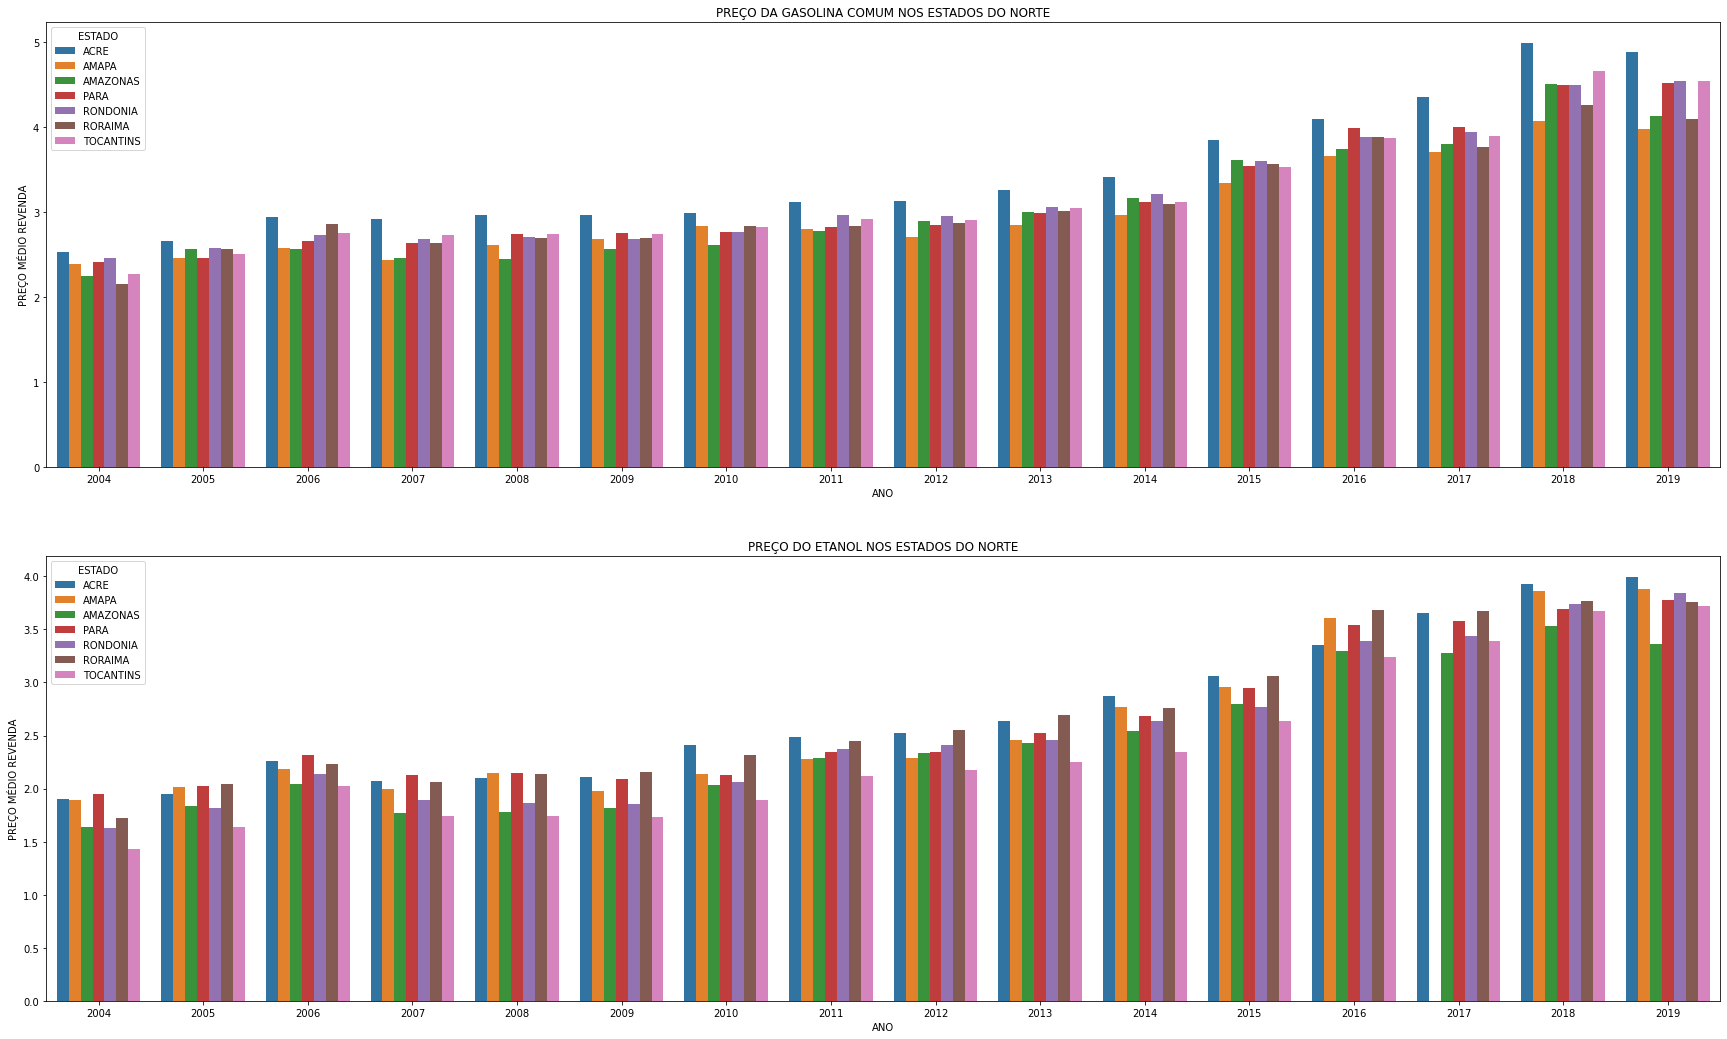

In [106]:
fig, axes = plt.subplots(2, 1, figsize=(30, 18))

sns.barplot(data=df_norte_gasol_etan.query('PRODUTO == "GASOLINA COMUM"'), x='ANO', y='PREÇO MÉDIO REVENDA', hue='ESTADO', ci='sd', ax=axes[0])
axes[0].set_title('PREÇO DA GASOLINA COMUM NOS ESTADOS DO NORTE')

sns.barplot(data=df_norte_gasol_etan.query('PRODUTO == "ETANOL HIDRATADO"'), x='ANO', y='PREÇO MÉDIO REVENDA', hue='ESTADO', ci='sd', ax=axes[1])
axes[1].set_title('PREÇO DO ETANOL NOS ESTADOS DO NORTE')

##2.8. Há correlação entre os Preços de Distrubuição e o Preço de Revenda dos combustíveis?

In [105]:
data.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,ANO-MÊS
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004,2004-05-01
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004,2004-05-01
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004,2004-05-01
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004,2004-05-01
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004,2004-05-01


In [107]:
df = data[['PREÇO MÉDIO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO']]
df.head()

,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO
0,1.288,0.825
1,1.162,0.763
2,1.389,0.970
3,1.262,0.830
4,1.181,0.941


In [108]:
df.corr()

,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO
PREÇO MÉDIO REVENDA,1.000000,0.994852
PREÇO MÉDIO DISTRIBUIÇÃO,0.994852,1.000000


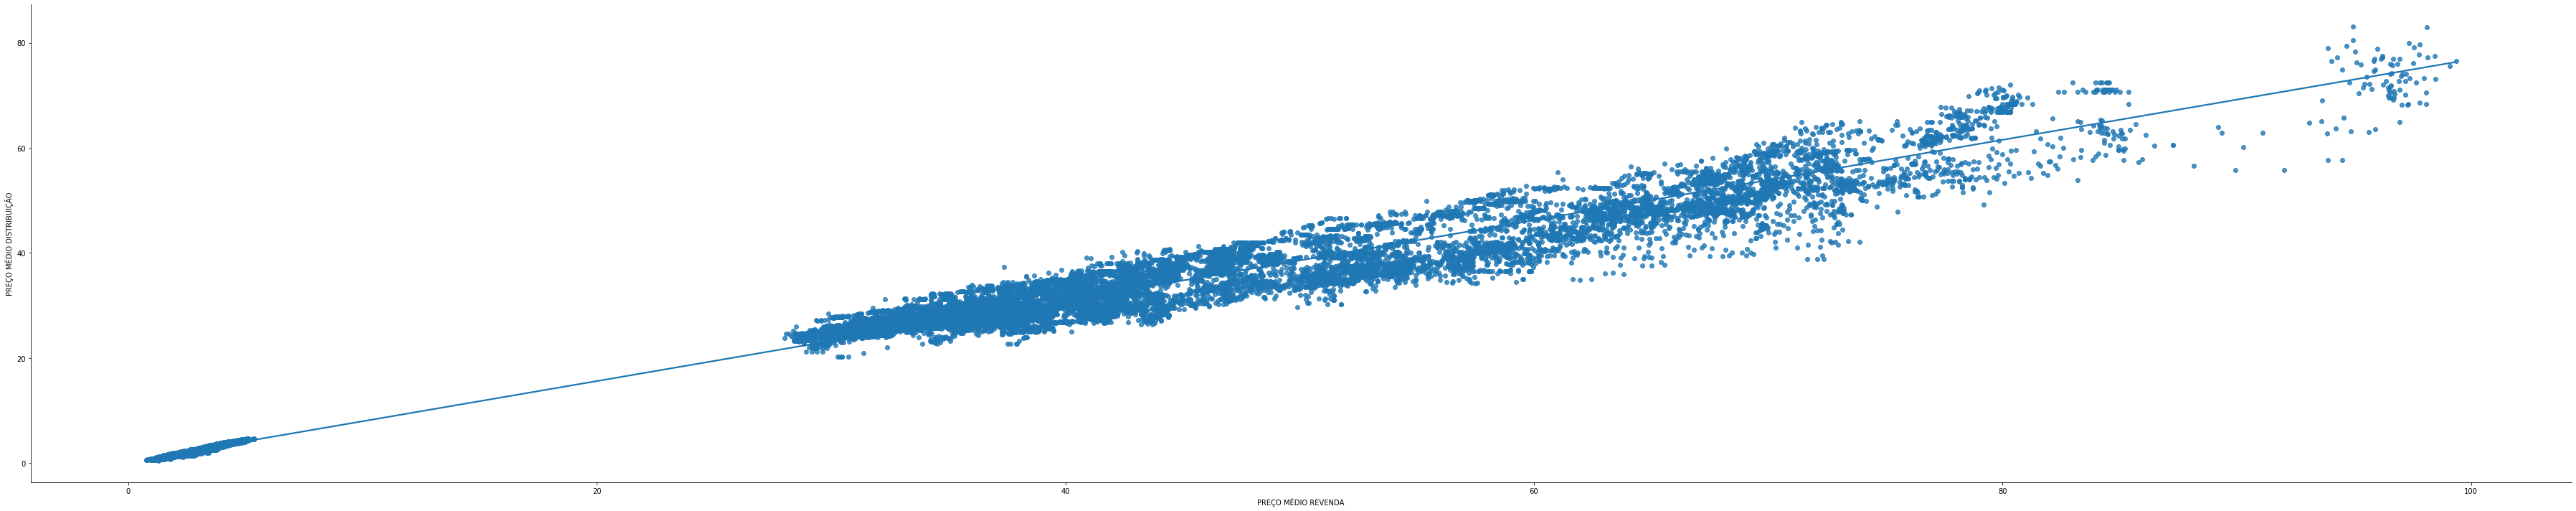

In [109]:
sns.lmplot(data=df, x='PREÇO MÉDIO REVENDA', y='PREÇO MÉDIO DISTRIBUIÇÃO', aspect=5, height=10)

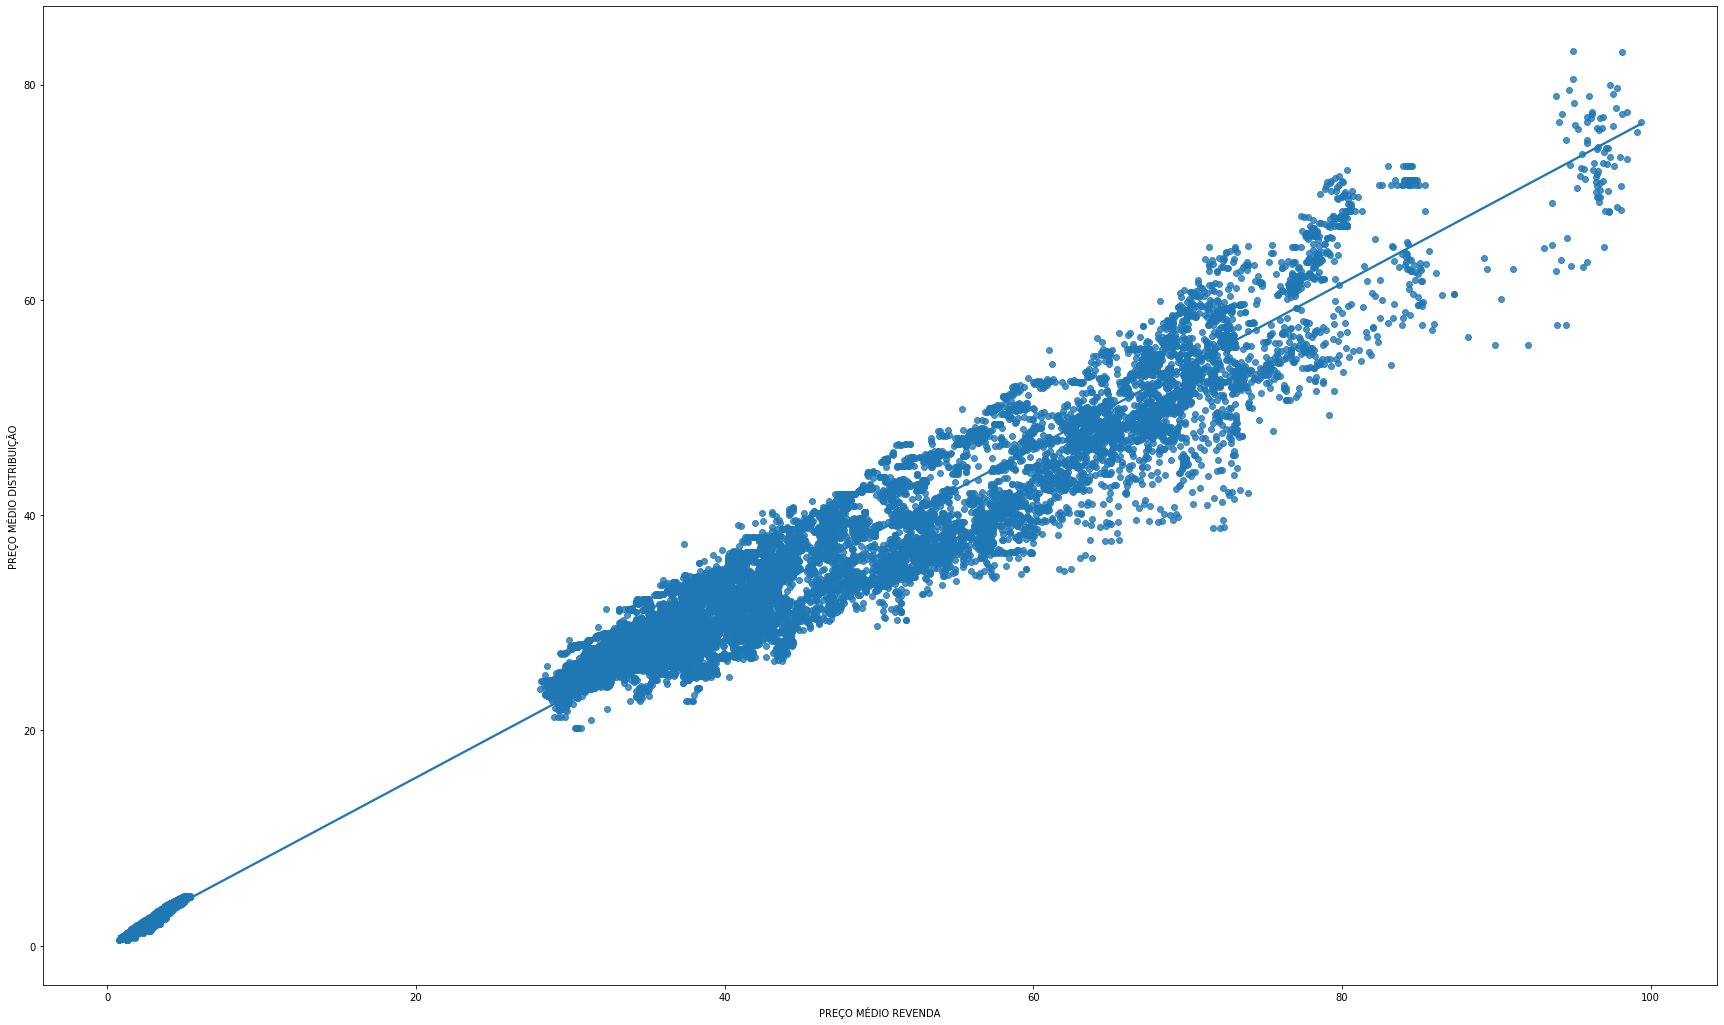

In [110]:
plt.figure(figsize=(30,18))
sns.regplot(data=df, x='PREÇO MÉDIO REVENDA', y='PREÇO MÉDIO DISTRIBUIÇÃO')

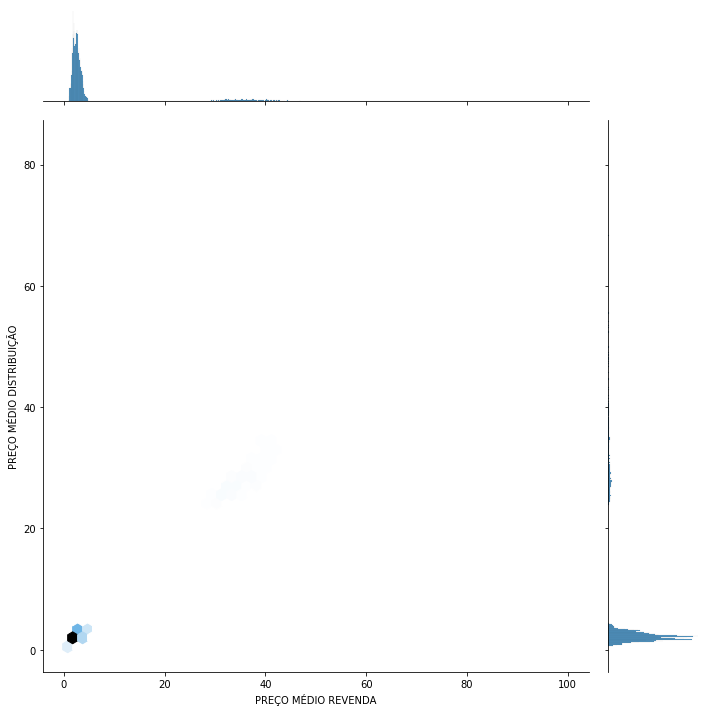

In [111]:
sns.jointplot(data=df, x='PREÇO MÉDIO REVENDA', y='PREÇO MÉDIO DISTRIBUIÇÃO', kind='hex', height=10)

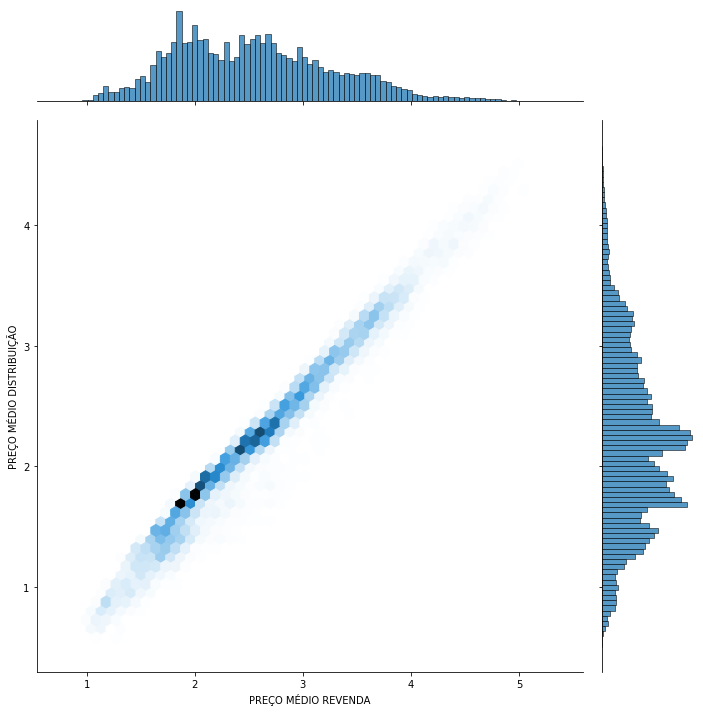

In [112]:
#Analisando apenas o intervalor mais denso
df_viz = df[df['PREÇO MÉDIO REVENDA']<=10]

sns.jointplot(data=df_viz, x='PREÇO MÉDIO REVENDA', y='PREÇO MÉDIO DISTRIBUIÇÃO', kind='hex', height=10)